<a href="https://colab.research.google.com/github/lisosoma/BI_NGS/blob/main/NGS_HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Шестое домашнее задание

### Оценка качества и сборка различных технологий


1. Сборка длинных ридов
Соберите данные PacBio с разным покрытием любым понравившимся вам сборщиком.

Будем собирать риды сборщиком Flye. Таким образом получим 4 сборки для различных покрытий. Далее запустим Quast и оценим качество сборки.

 - Риды pacbio_10x

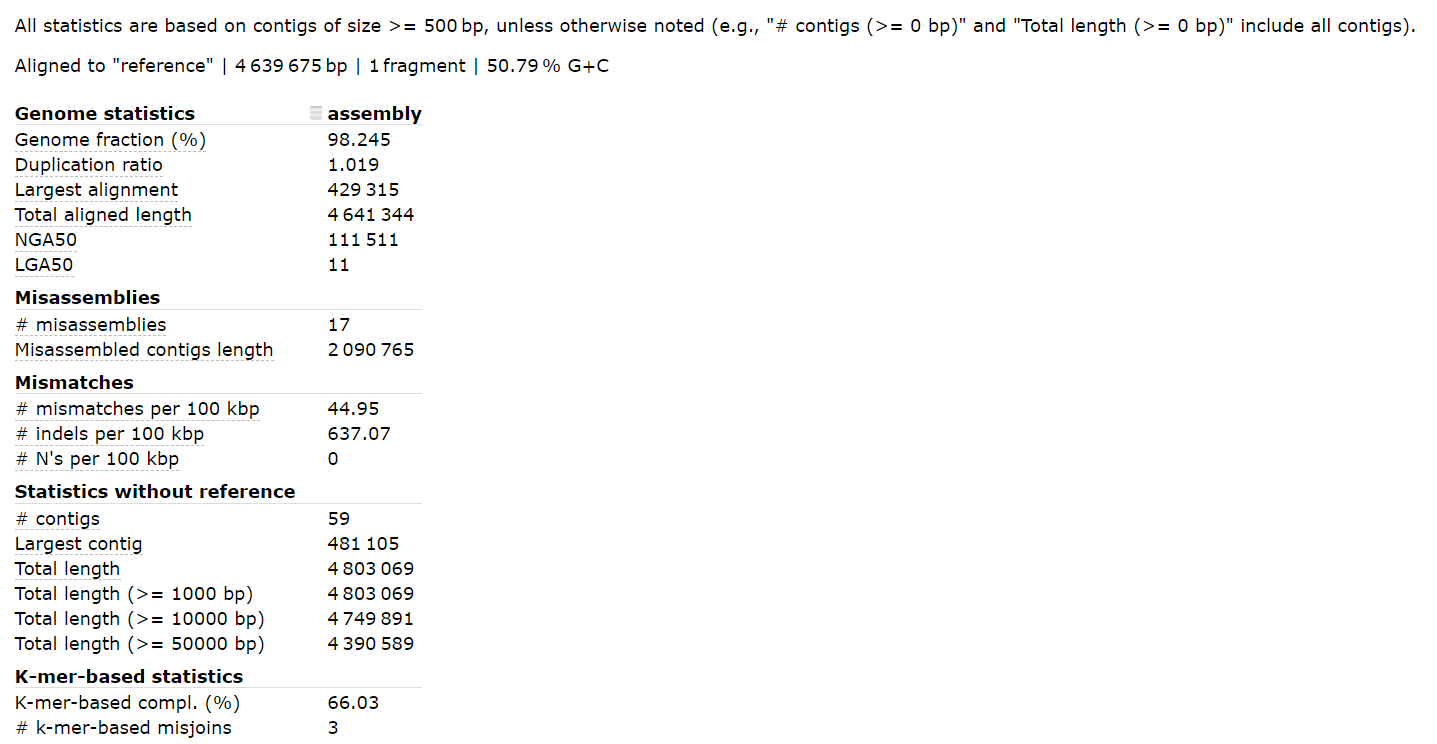

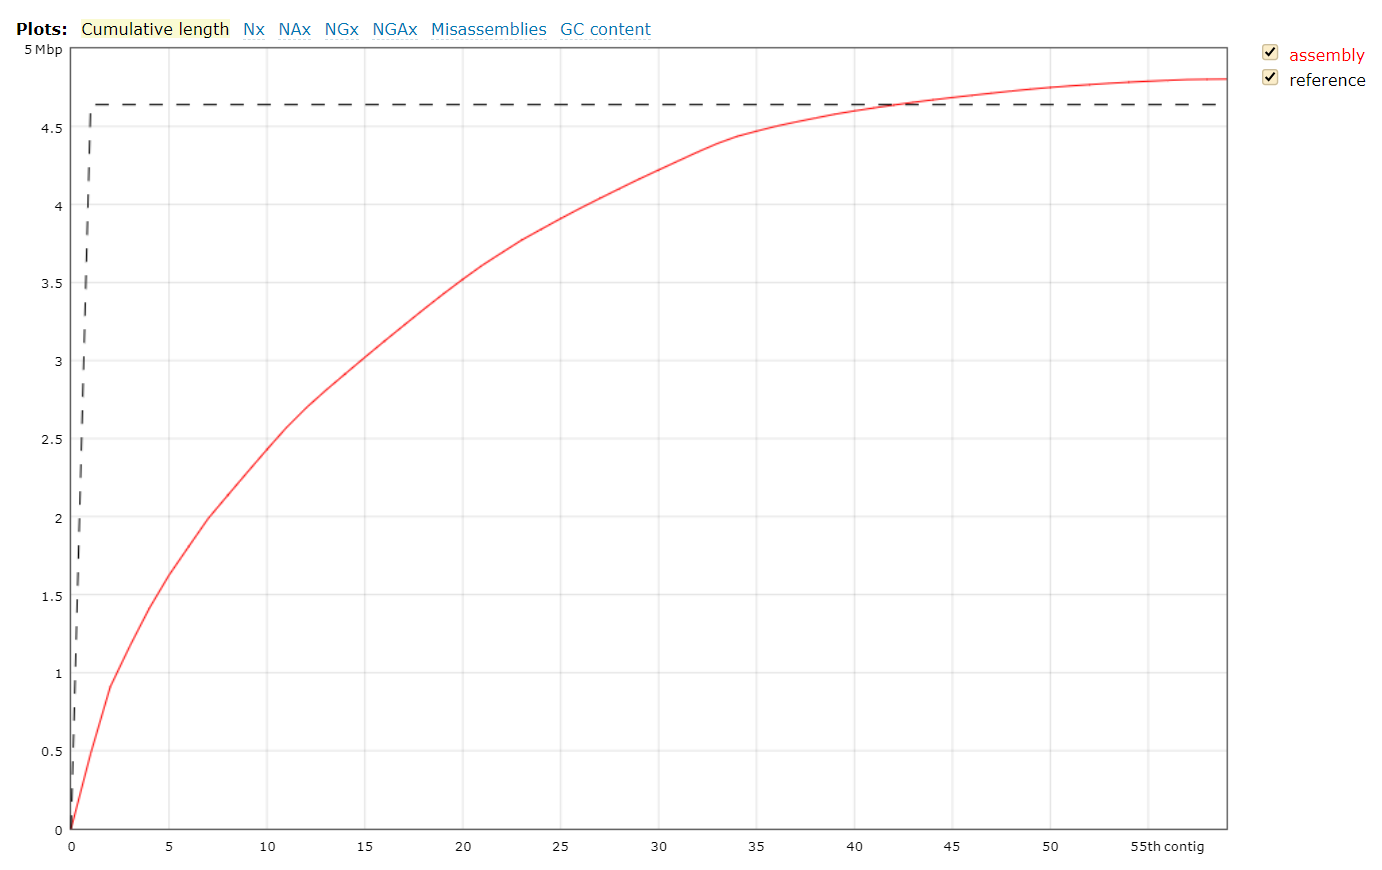

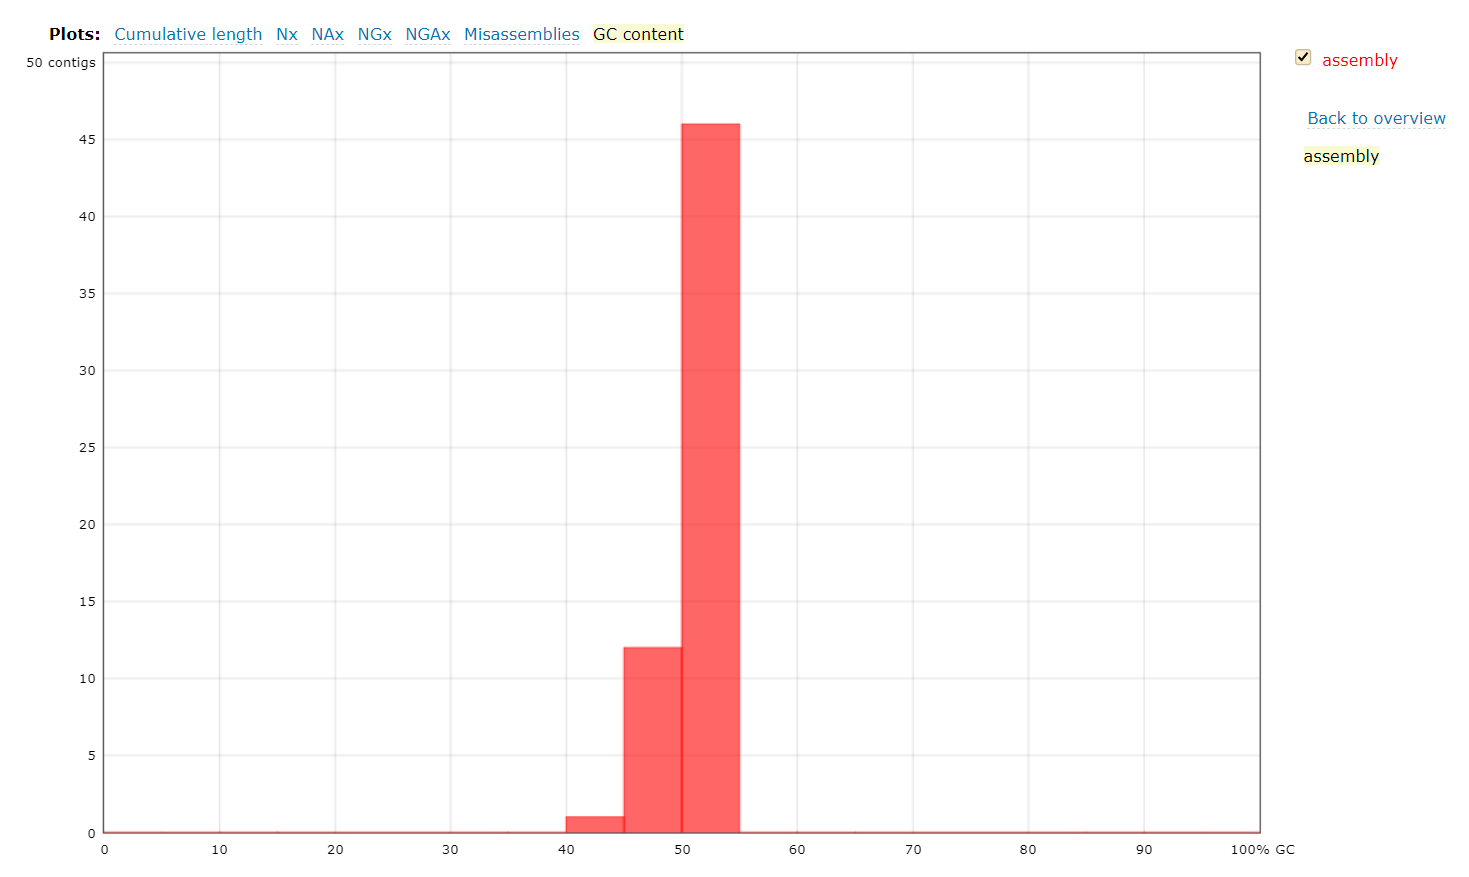

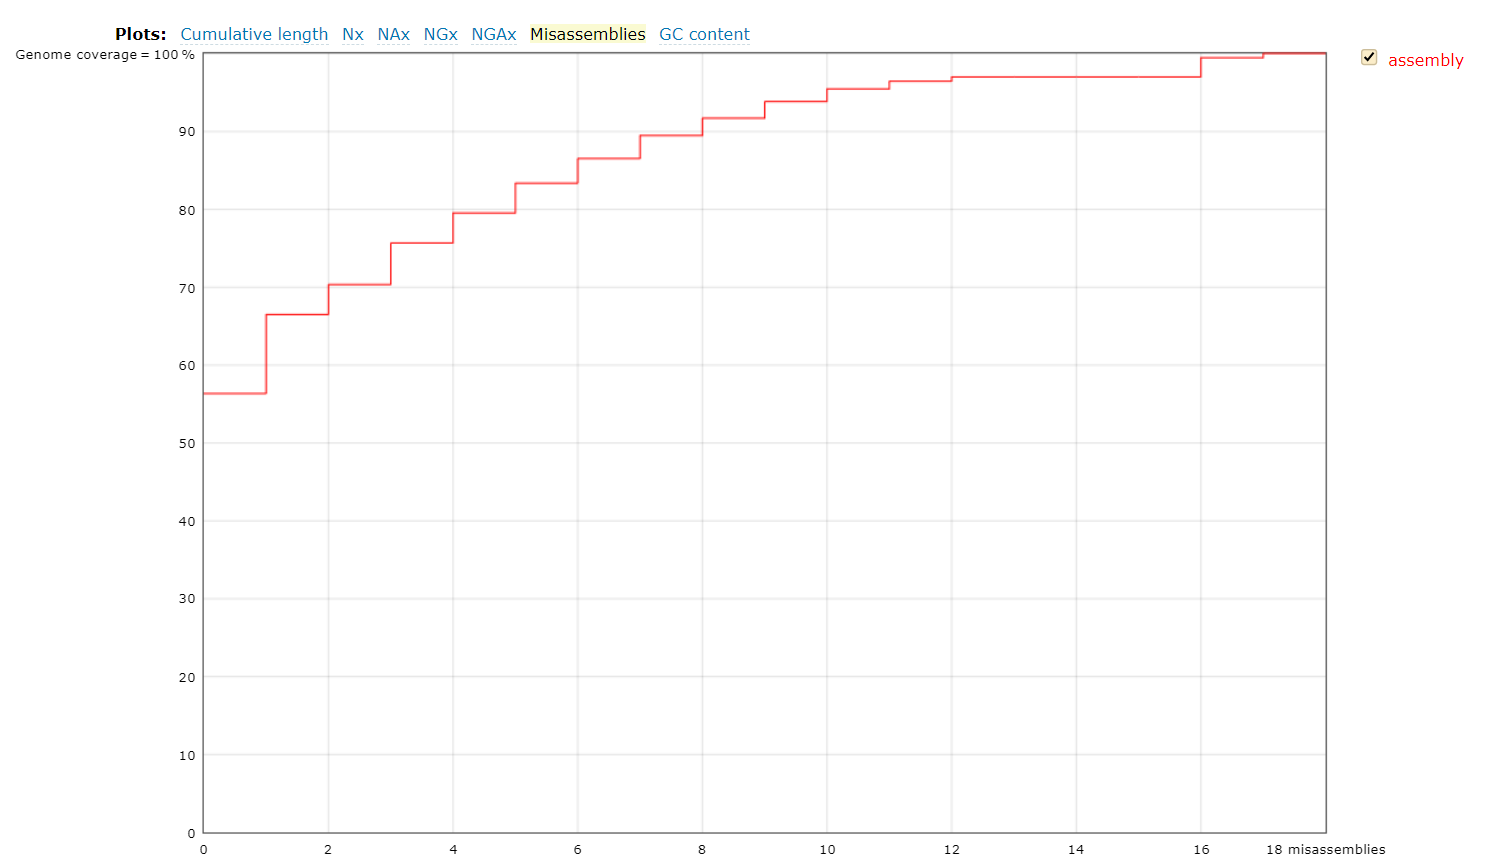

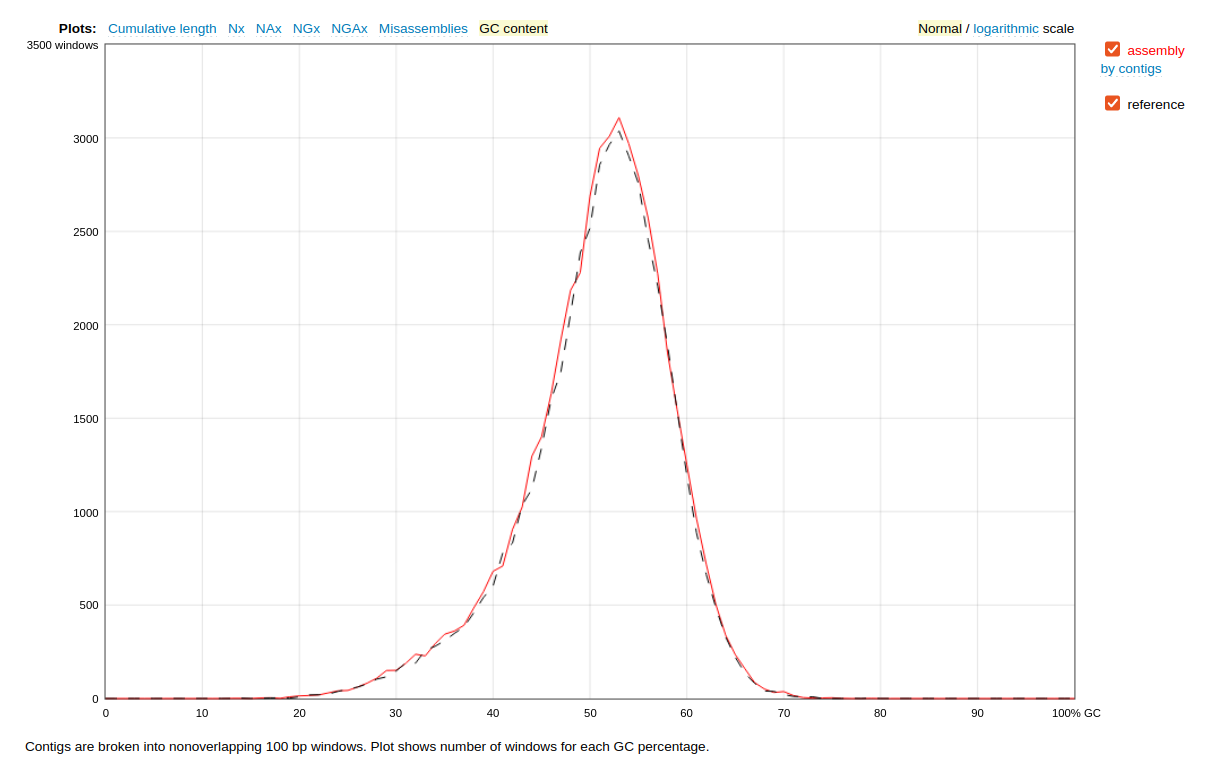

 - Риды pacbio_20x

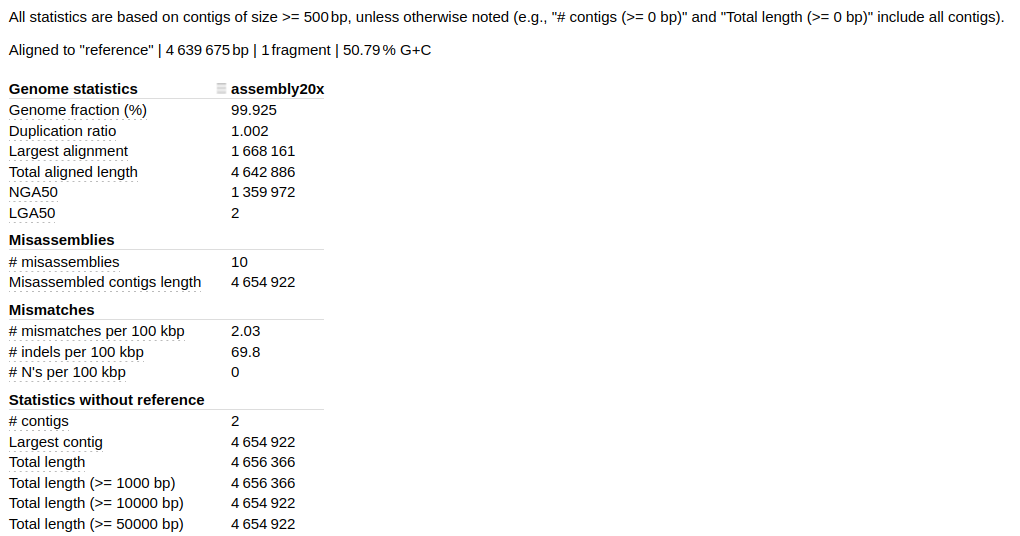

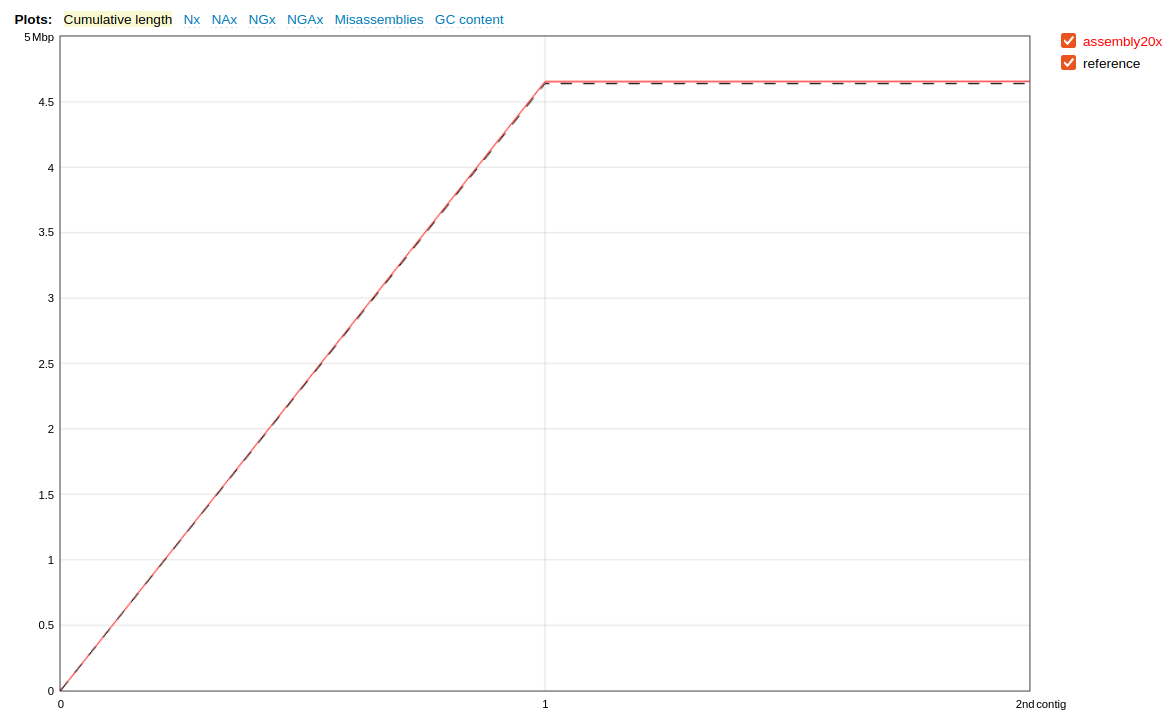

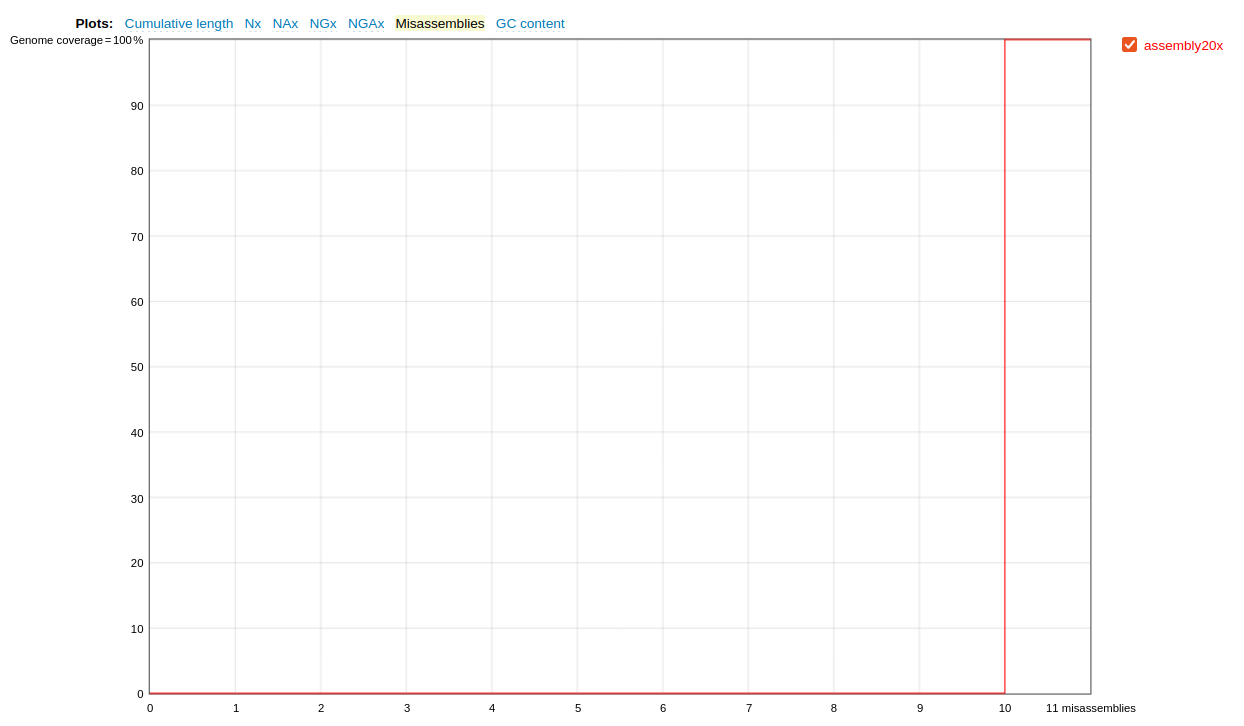

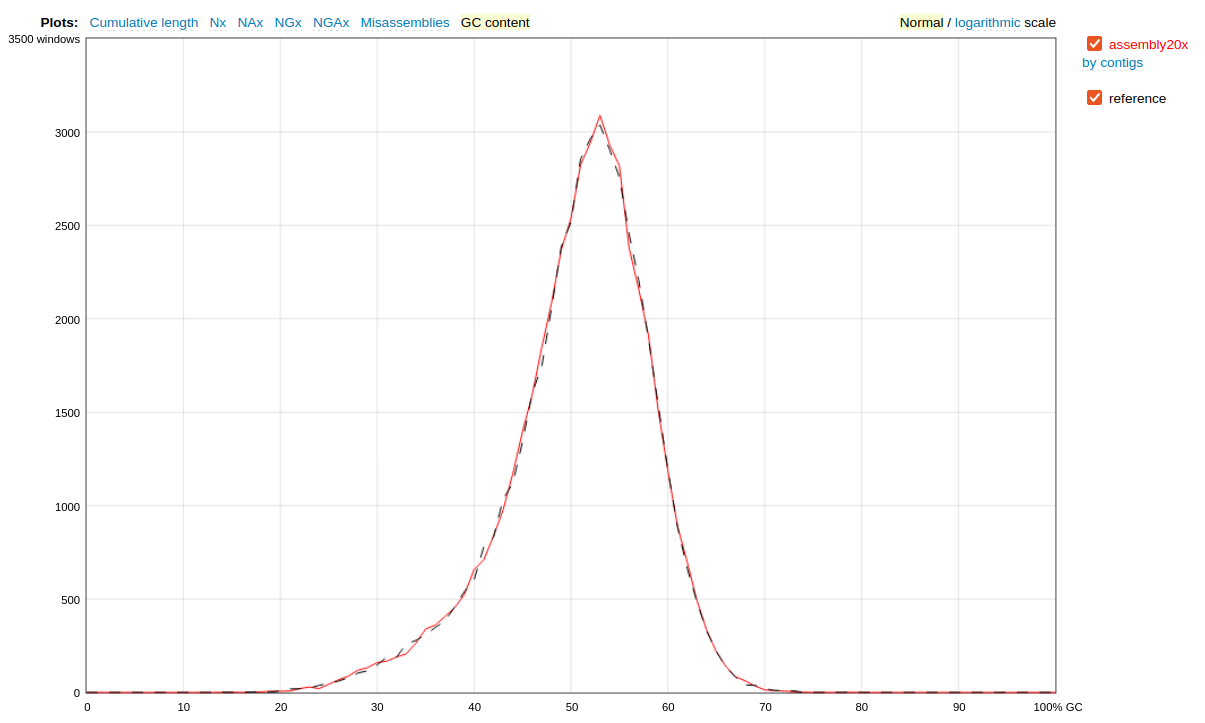

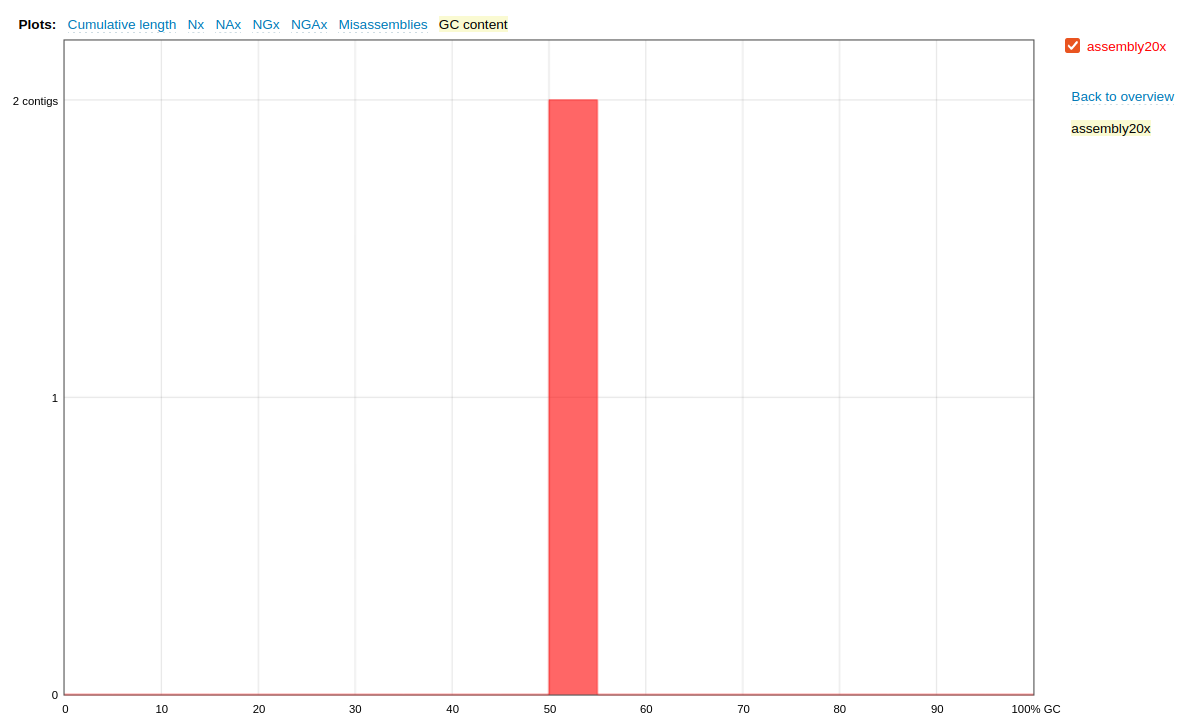

- Риды pacbio_40x

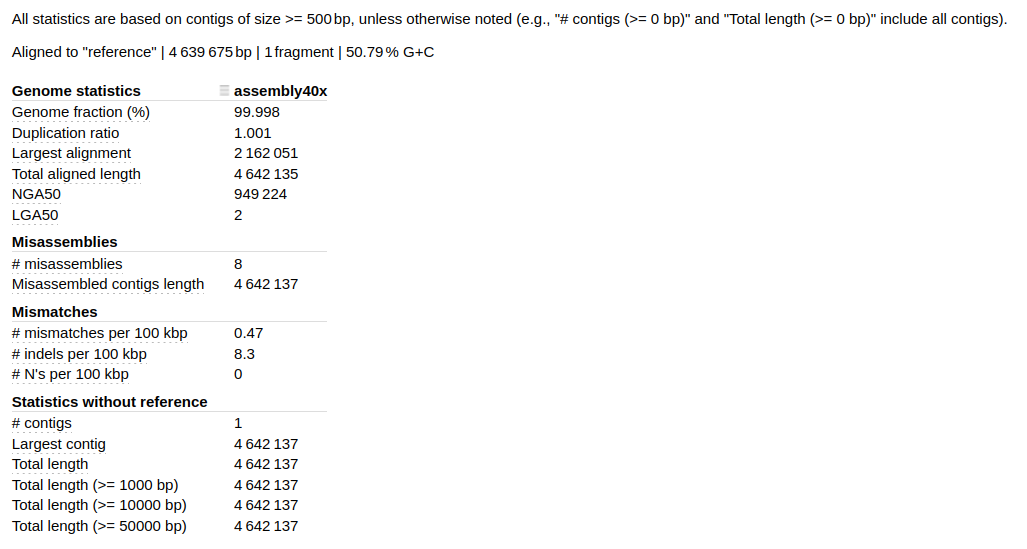

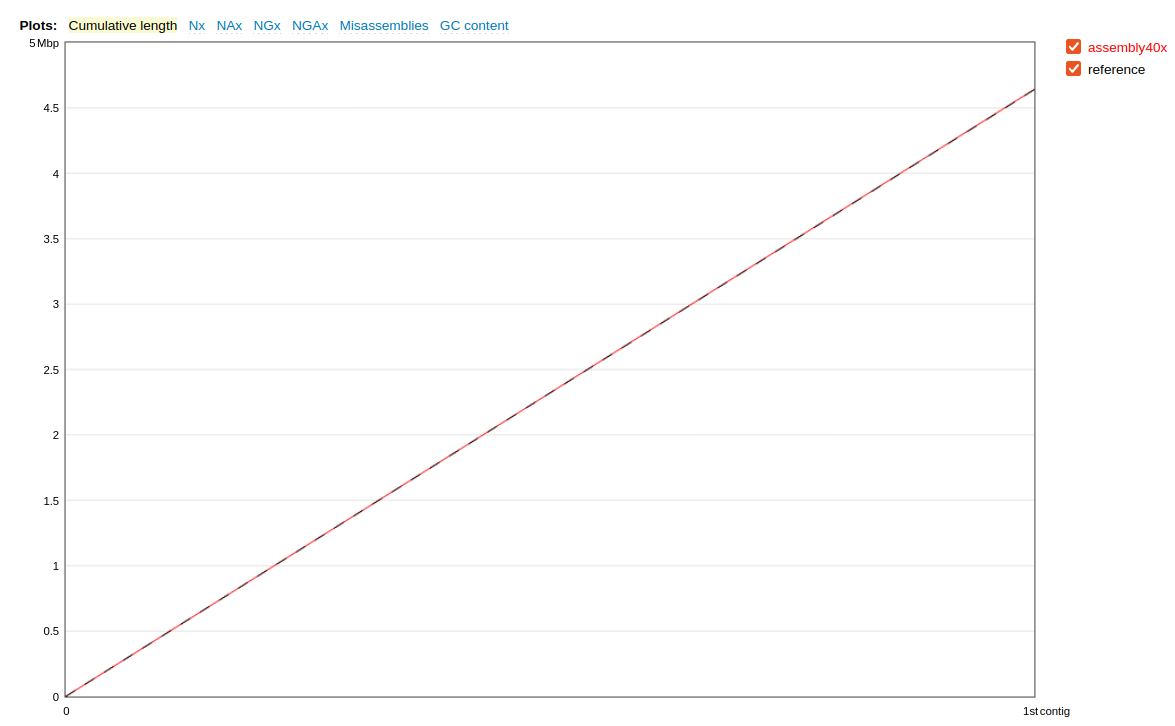

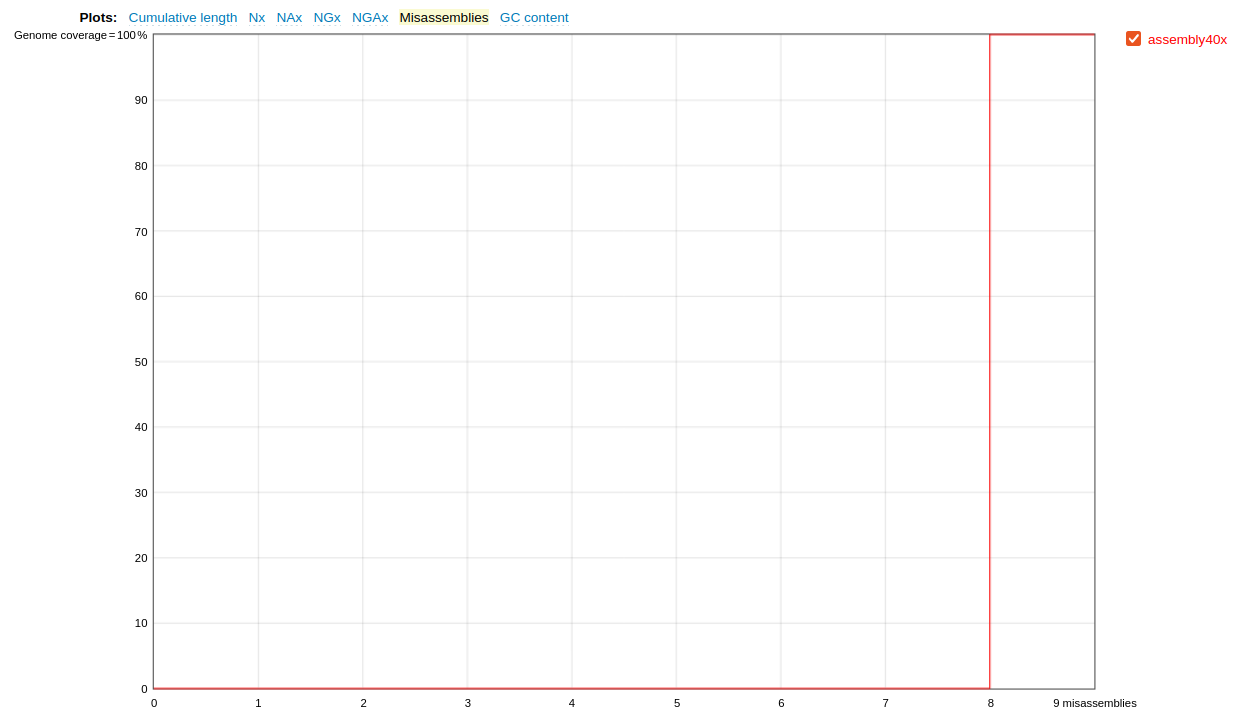

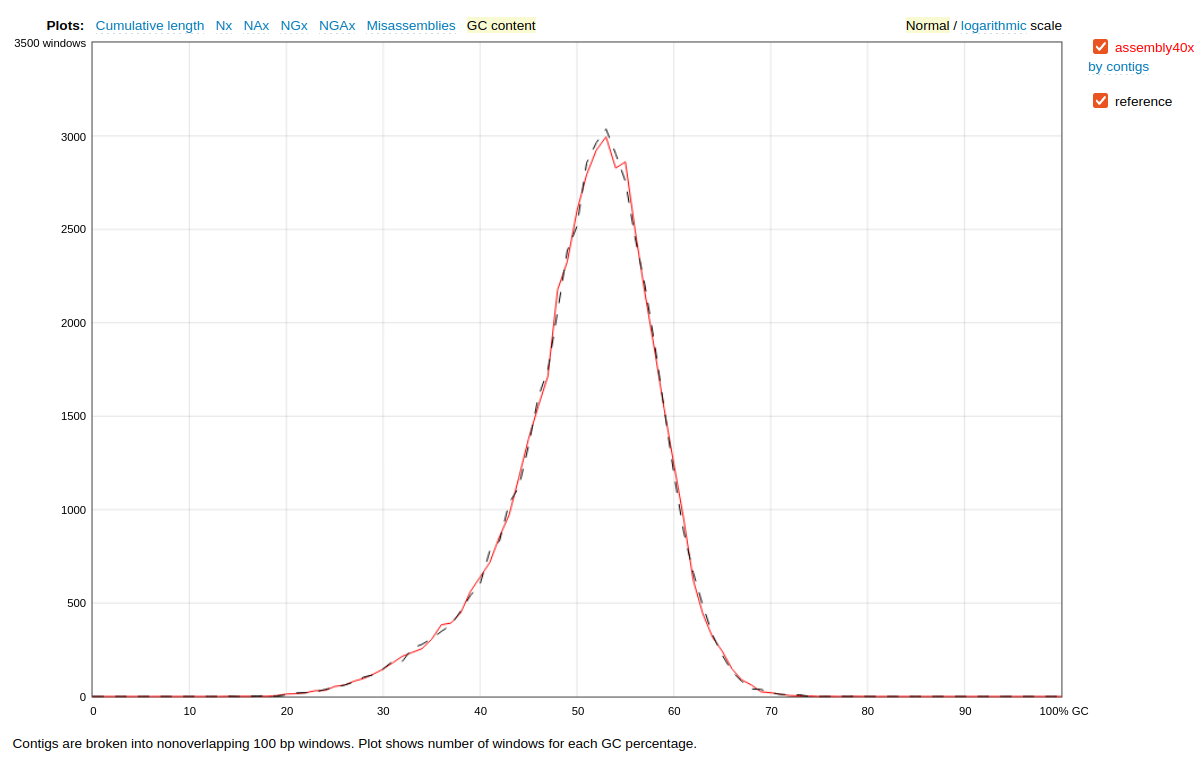

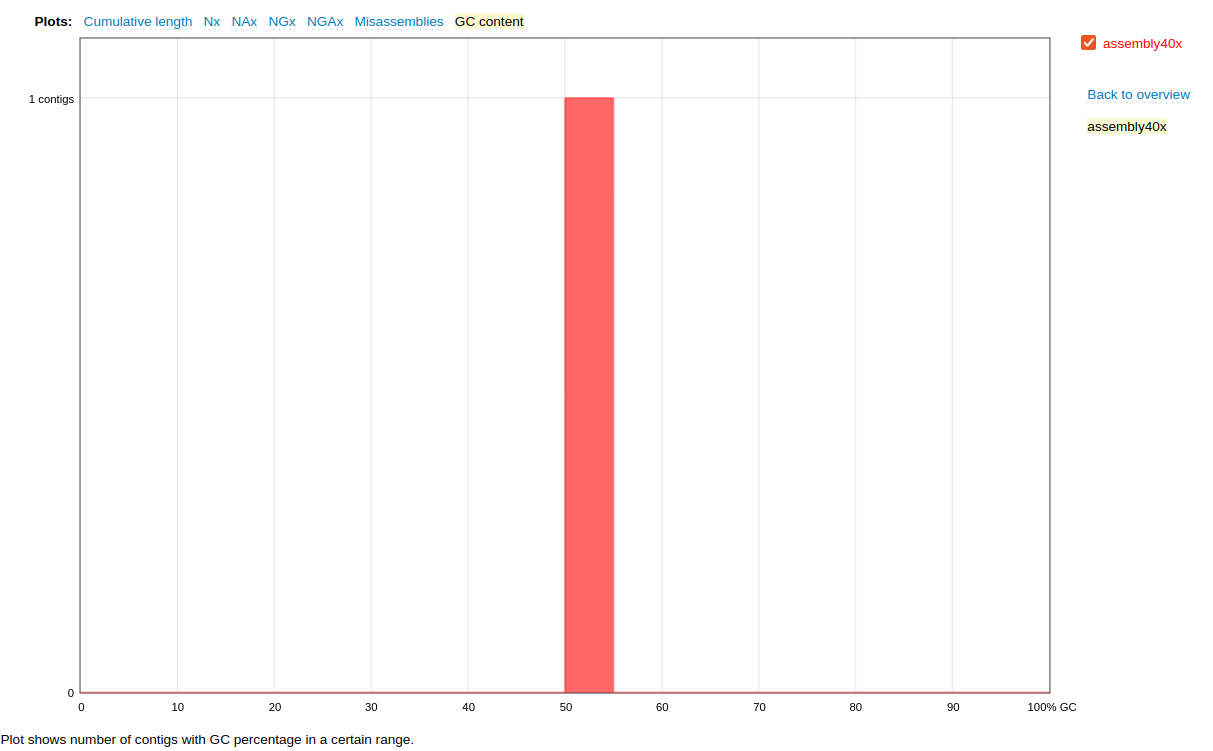

- Риды pacbio_80x

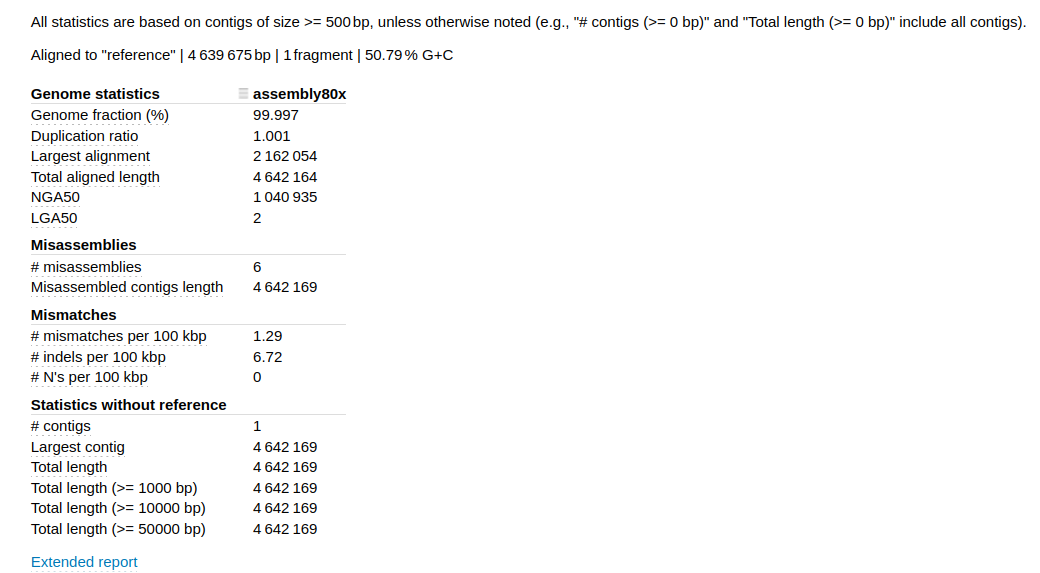

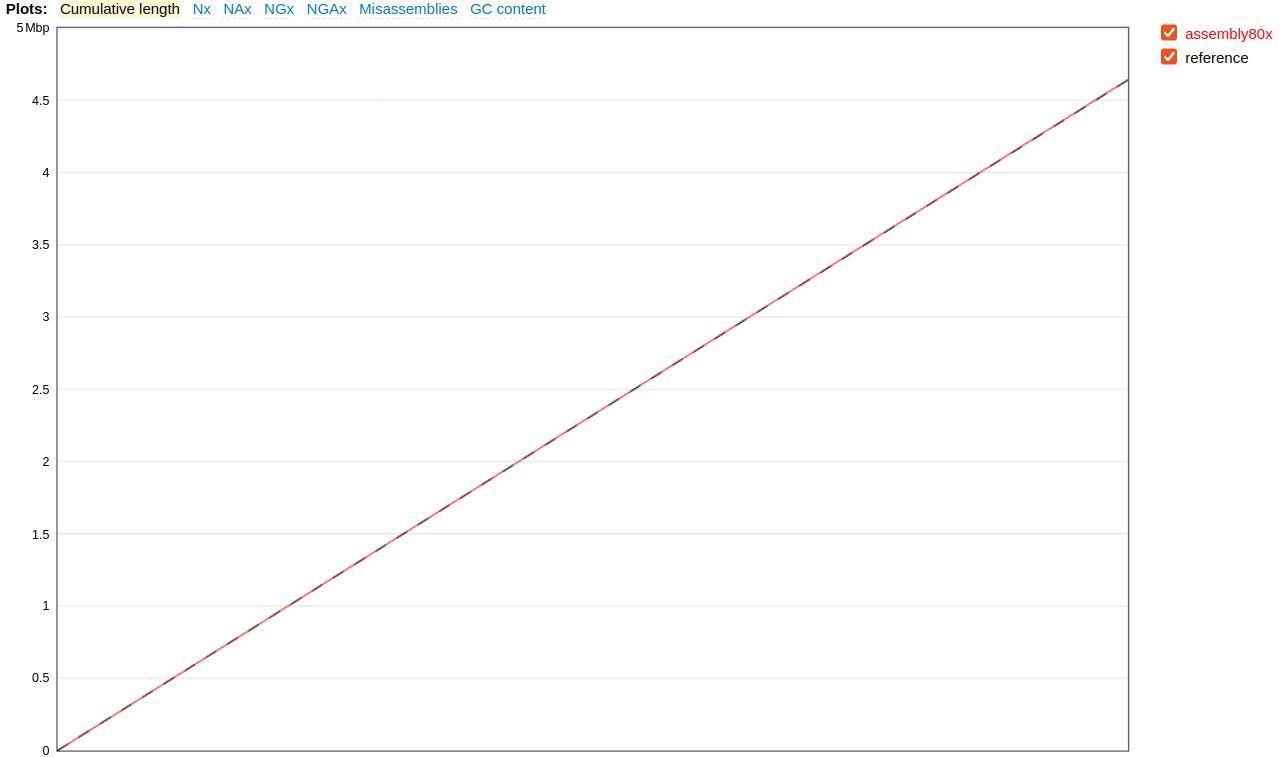

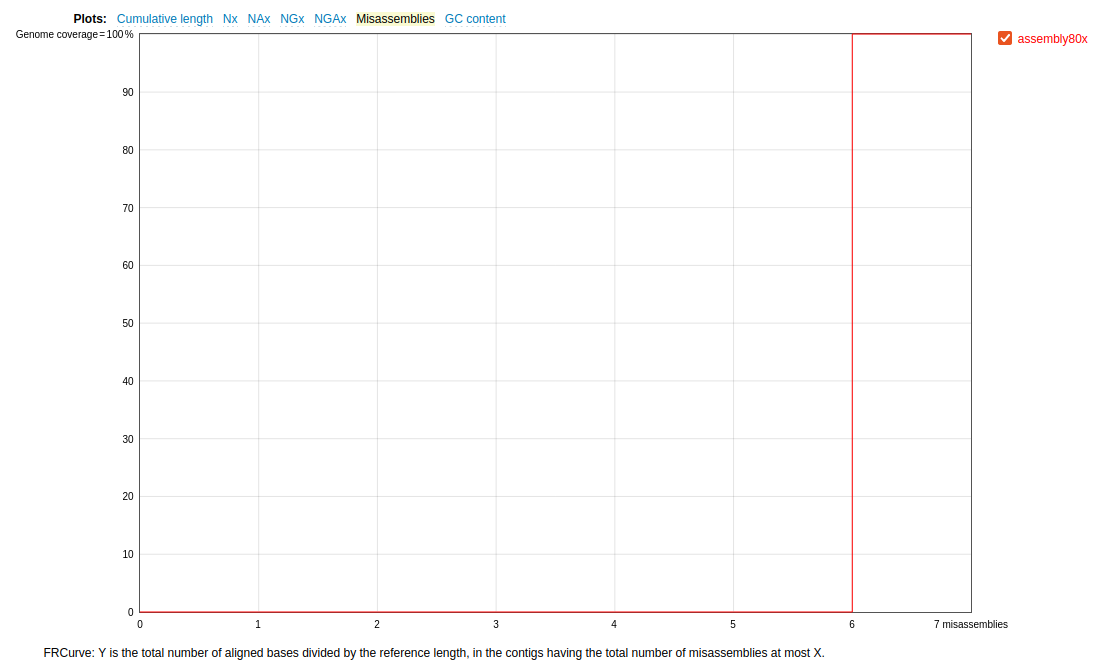

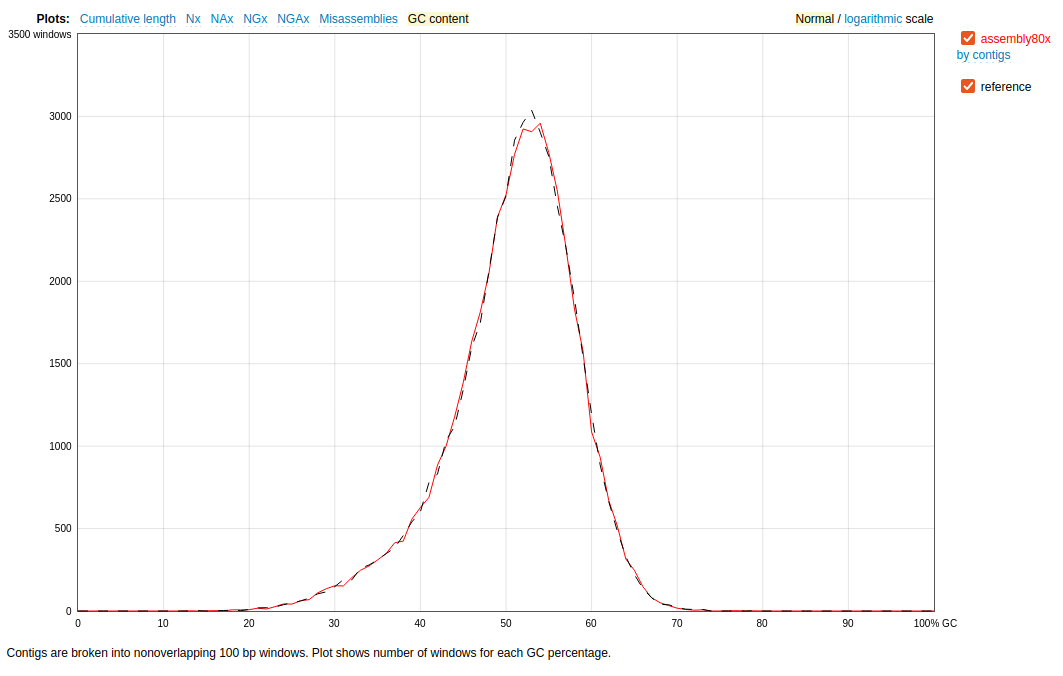

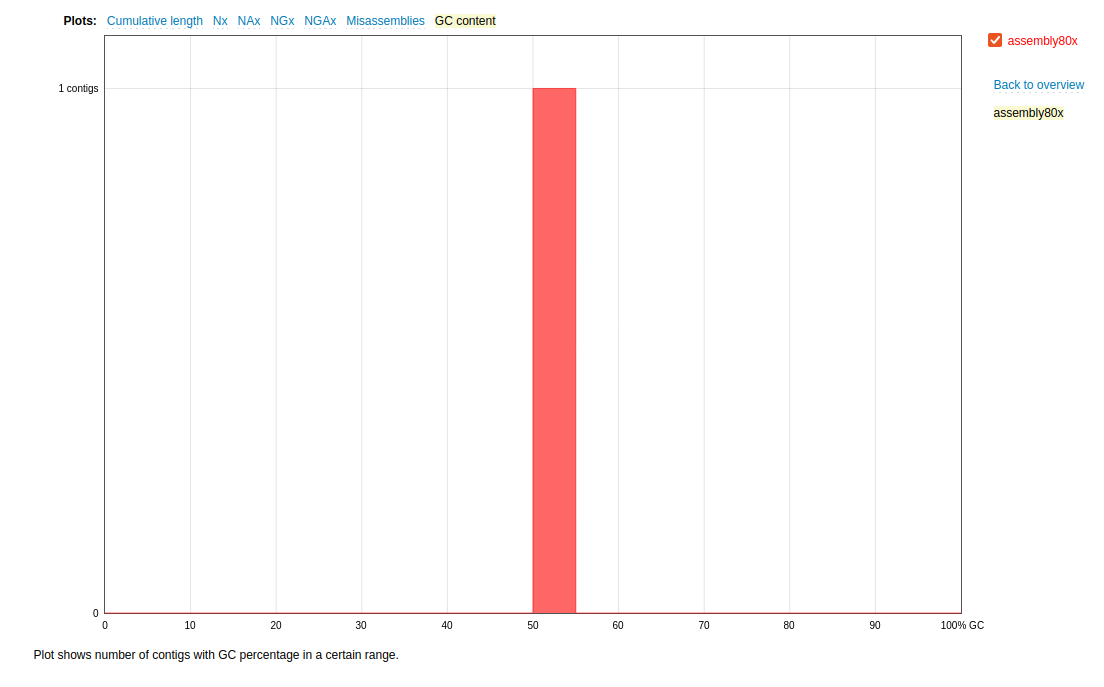

2. Сборка коротких ридов
Соберите данные Illumina любым понравившимся вам сборщиком.

Для сборки данных Illumina будем использовать SPAdes. Запустим сборщик со следующими параметрами для парных ридов:

In [ ]:
!spades.py -1 illumina.100x.1.fq.gz -2 illumina.100x.2.fq.gz -o ./results

Оценим качество сборки с помощью QUAST.

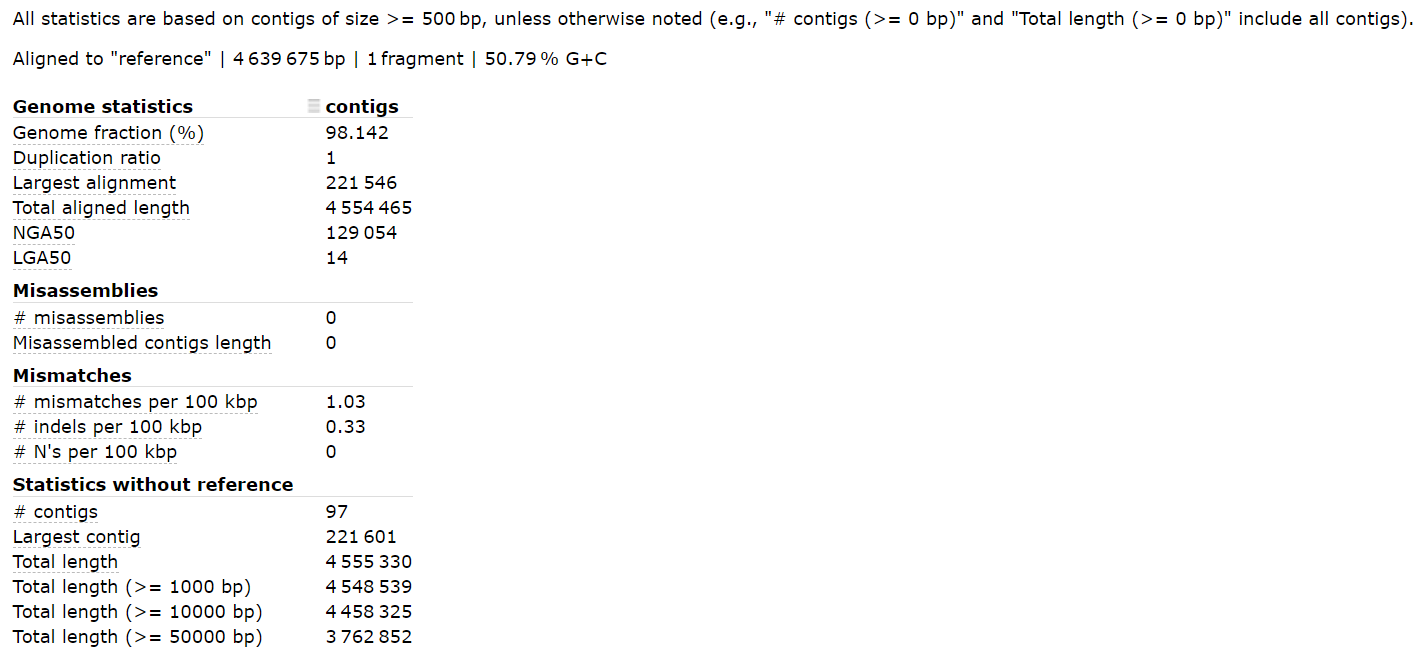

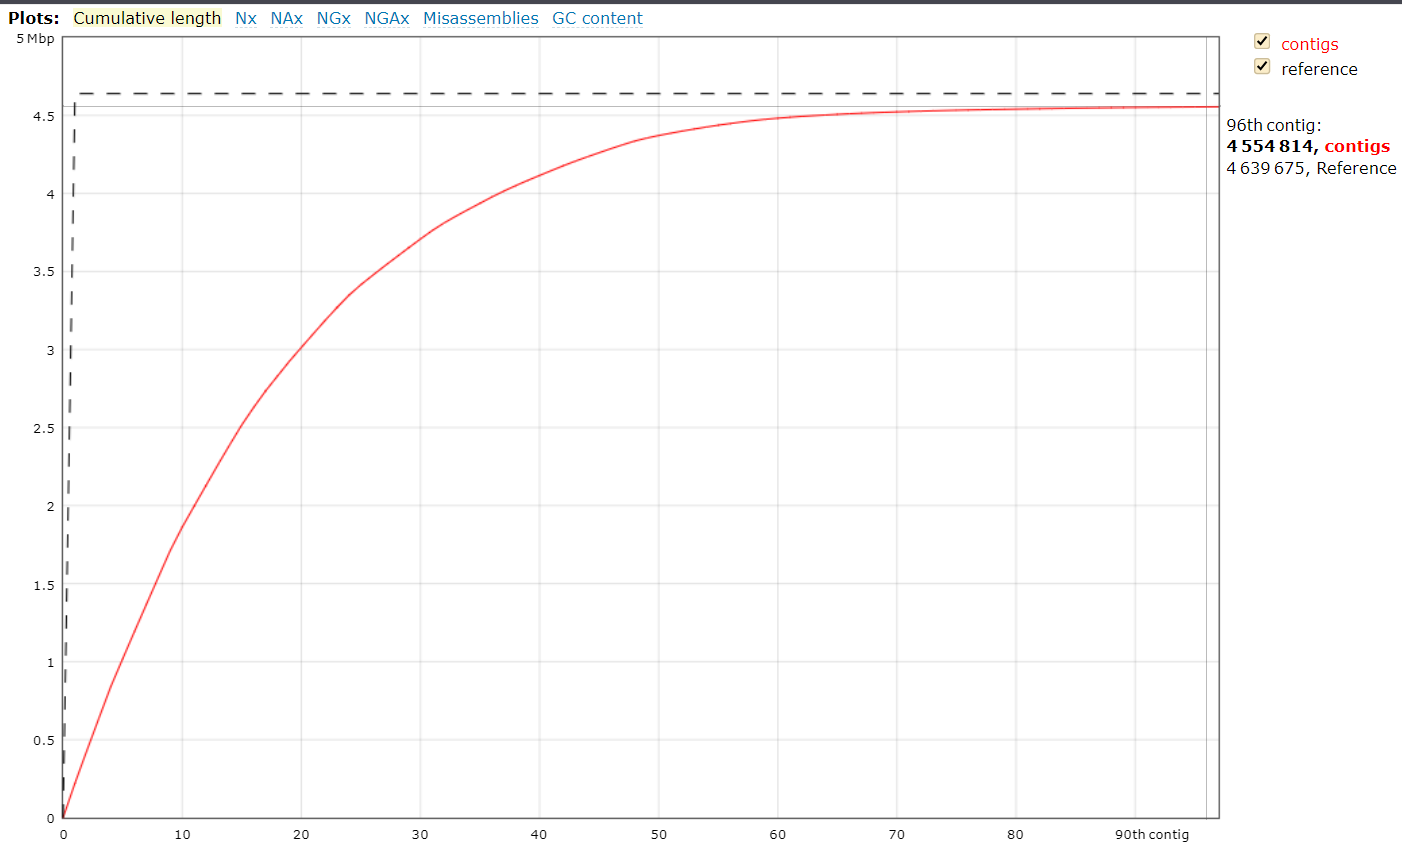

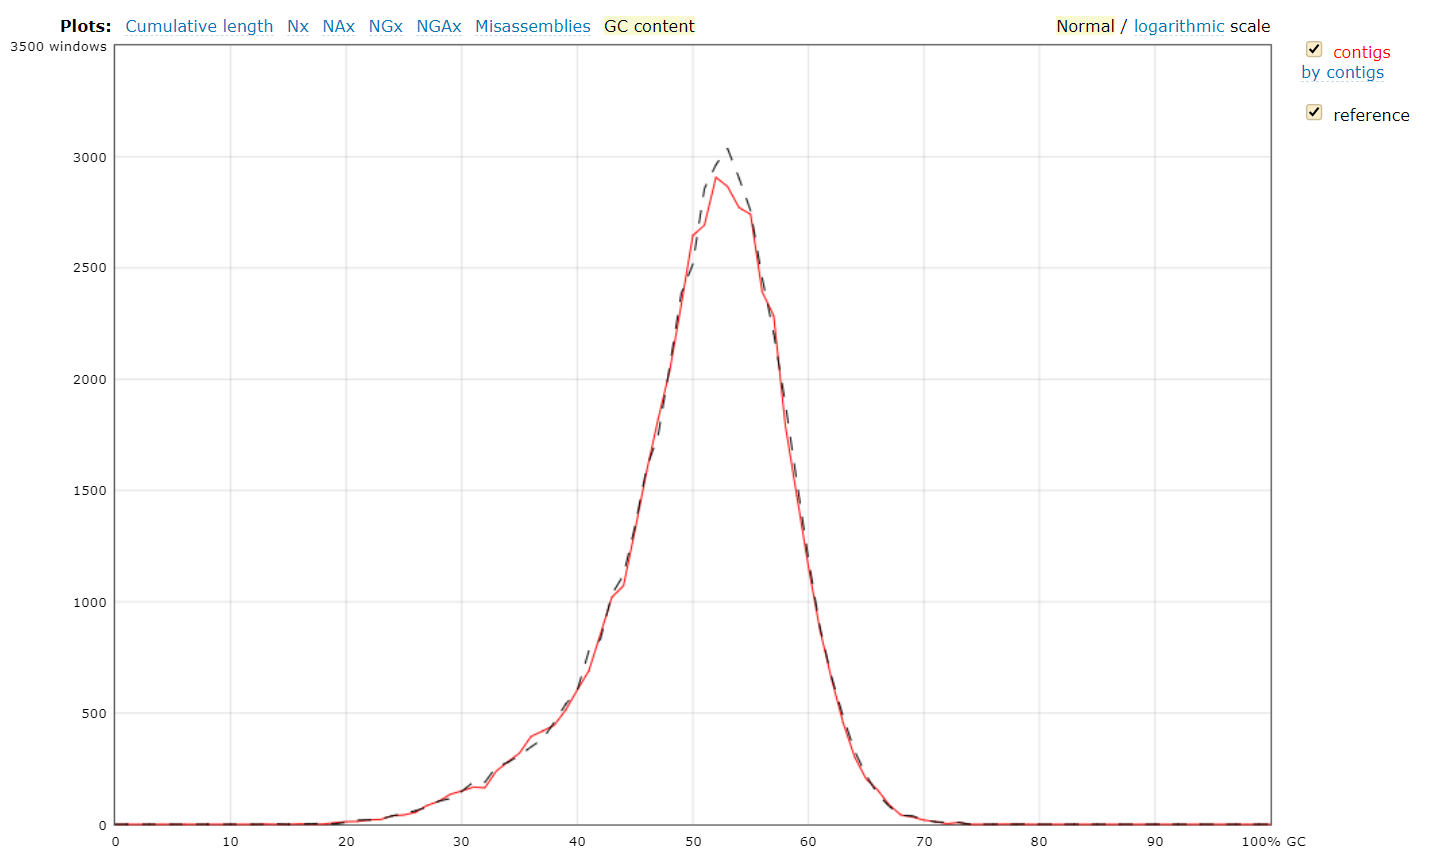

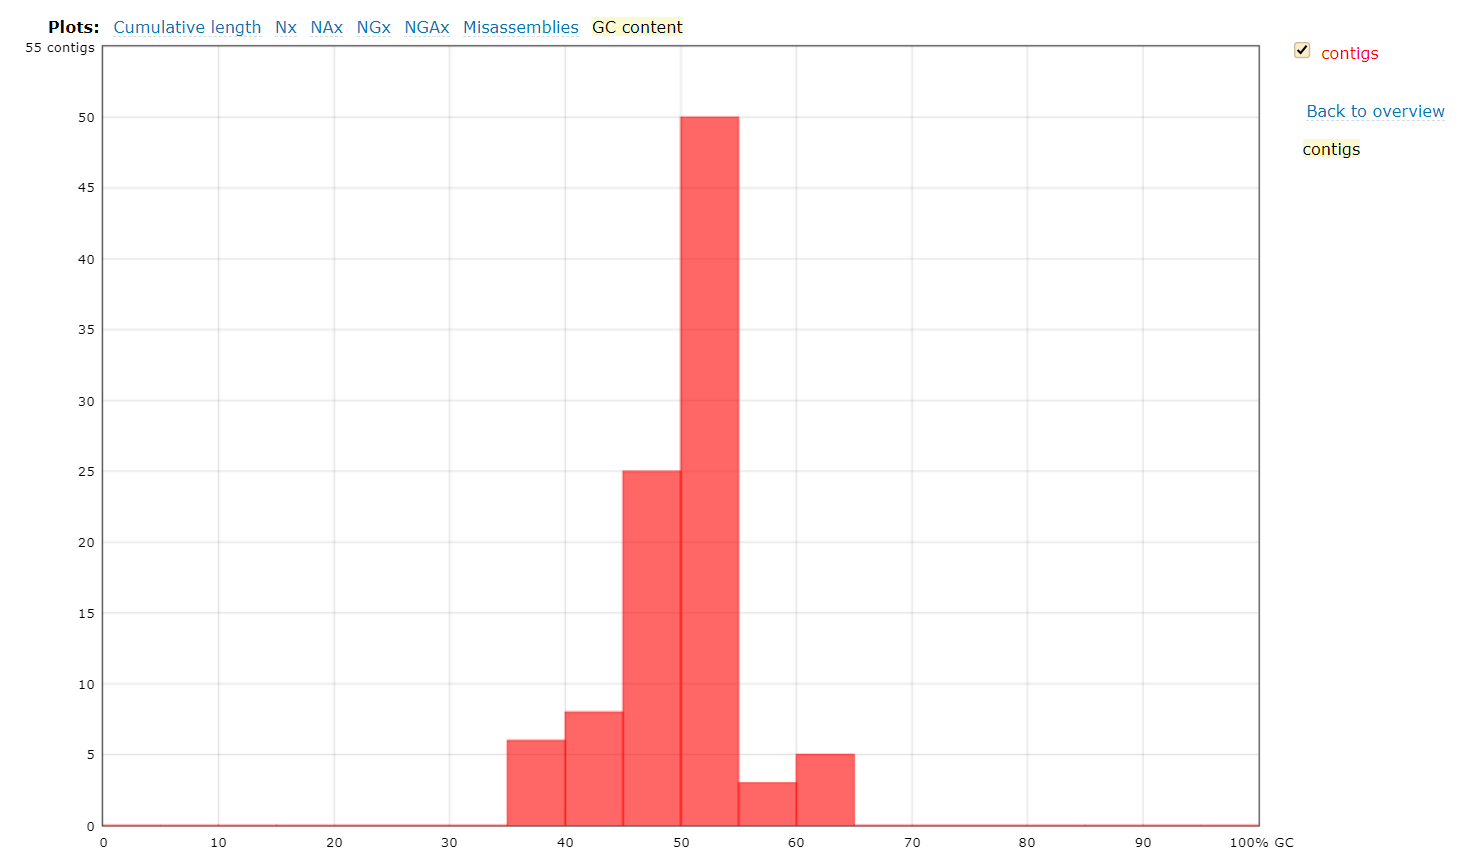

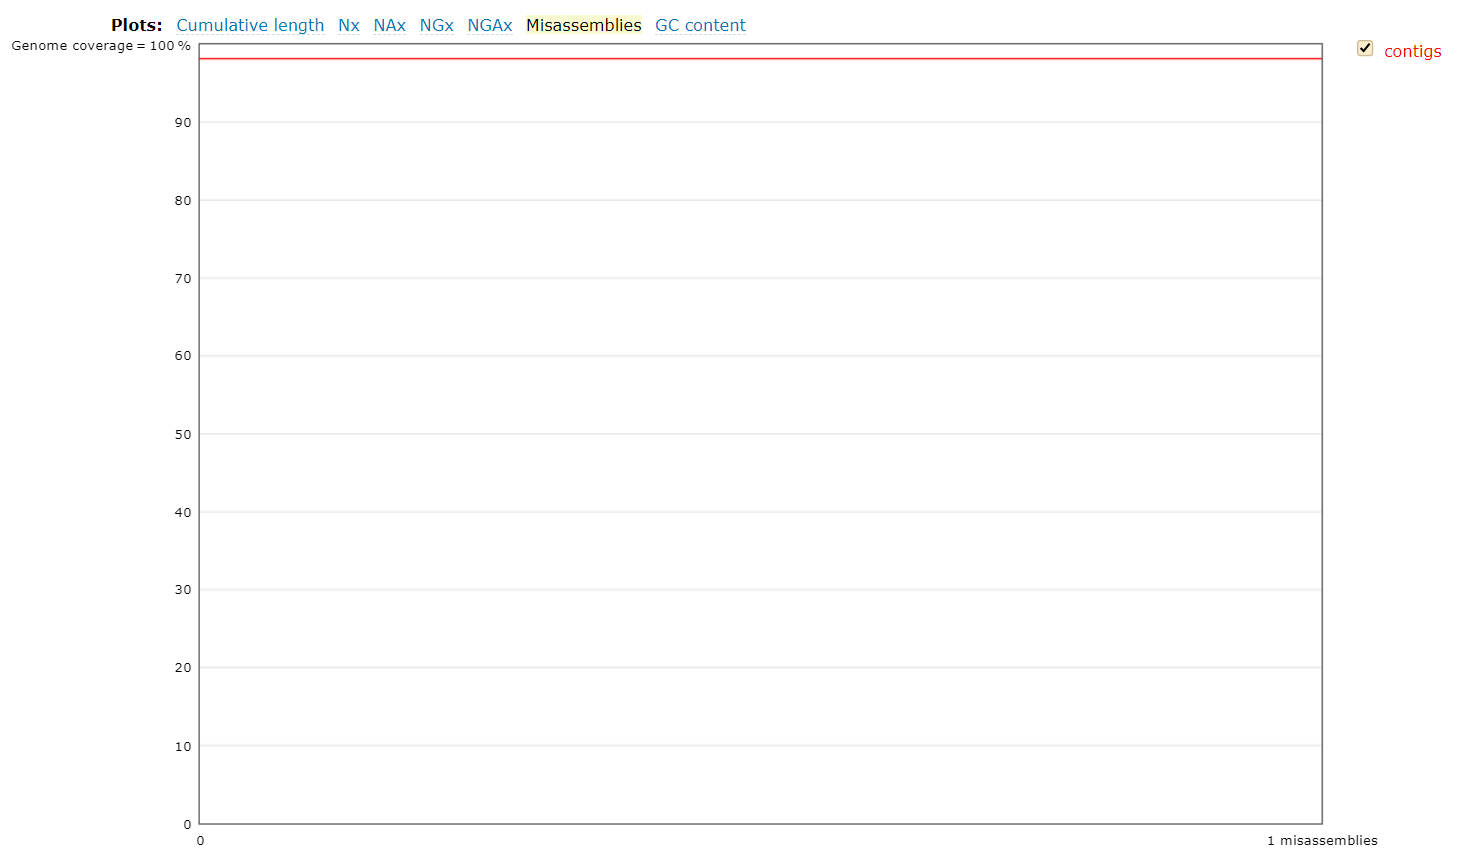

#### Команды для проведения анализа

In [ ]:
# Install conda and add channels to look for packages in
import sys
! wget https://repo.anaconda.com/archive/Anaconda3-2020.02-Linux-x86_64.sh
! chmod +x Anaconda3-2020.02-Linux-x86_64.sh
! bash ./Anaconda3-2020.02-Linux-x86_64.sh -b -f -p /usr/local
sys.path.append('/usr/local/lib/python3.7/site-packages/')
! conda update -n base -c defaults conda -y
! conda config --add channels bioconda
! conda config --add channels conda-forge

In [ ]:
!conda install flye

In [ ]:
!flye --pacbio-raw pacbio_10x.fq.gz --out-dir out_pacbio --threads 4 -g 4.8m --asm-coverage 10
!flye --pacbio-raw pacbio_20x.fq.gz --out-dir out_pacbio2 --threads 8 -g 4.8m --asm-coverage 20
!flye --pacbio-raw pacbio_40x.fq.gz --out-dir out_pacbio3 --threads 16 -g 4.8m --asm-coverage 40
!flye --pacbio-raw pacbio_80x.fq.gz --out-dir out_pacbio4 --threads 32 -g 4.8m --asm-coverage 80

In [ ]:
import shutil
shutil.make_archive('data1', 'zip', '/content/out_pacbio')
shutil.make_archive('data2', 'zip', '/content/out_pacbio2')
shutil.make_archive('data3', 'zip', '/content/out_pacbio3')
shutil.make_archive('data4', 'zip', '/content/out_pacbio4')

### Гибридная сборка

3. Гибридная сборка 
Сделайте гибридную сборку Illumina и PacBio (с разным покрытием) любым понравившимся вам сборщиком.

Соберем с помощью SPAdes.

In [ ]:
!conda install -c bioconda spades

In [ ]:
!spades.py -t 16 \
          -m 32 \
          --pacbio /content/drive/MyDrive/hw6/pacbio_10x.fq.gz \
          -1 /content/drive/MyDrive/hw6/illumina.100x.1.fq.gz -2 /content/drive/MyDrive/hw6/illumina.100x.2.fq.gz \
          -o hybrid_assembly1

In [ ]:
!spades.py -t 16 \
          -m 32 \
          --pacbio /content/drive/MyDrive/hw6/pacbio_20x.fq.gz \
          -1 /content/drive/MyDrive/hw6/illumina.100x.1.fq.gz -2 /content/drive/MyDrive/hw6/illumina.100x.2.fq.gz \
          -o hybrid_assembly2

In [ ]:
!spades.py -t 16 \
          -m 32 \
          --pacbio /content/drive/MyDrive/hw6/pacbio_40x.fq.gz \
          -1 /content/drive/MyDrive/hw6/illumina.100x.1.fq.gz -2 /content/drive/MyDrive/hw6/illumina.100x.2.fq.gz \
          -o hybrid_assembly3

In [ ]:
!spades.py -t 16 \
          -m 32 \
          --pacbio /content/drive/MyDrive/hw6/pacbio_80x.fq.gz \
          -1 /content/drive/MyDrive/hw6/illumina.100x.1.fq.gz -2 /content/drive/MyDrive/hw6/illumina.100x.2.fq.gz \
          -o hybrid_assembly4

In [ ]:
shutil.make_archive('datah1', 'zip', '/content/hybrid_assembly1')
!cp datah1.zip "drive/My Drive/hw6"
shutil.make_archive('datah2', 'zip', '/content/hybrid_assembly2')
!cp datah2.zip "drive/My Drive/hw6"
shutil.make_archive('datah3', 'zip', '/content/hybrid_assembly3')
!cp datah3.zip "drive/My Drive/hw6"
shutil.make_archive('datah4', 'zip', '/content/hybrid_assembly4')
!cp datah4.zip "drive/My Drive/hw6"

In [ ]:
!conda install -c bioconda quast

In [ ]:
!unzip /content/drive/MyDrive/hw6/datah4.zip -d datah4
!unzip /content/drive/MyDrive/hw6/datah1.zip -d datah1
!unzip /content/drive/MyDrive/hw6/datah2.zip -d datah2
!unzip /content/drive/MyDrive/hw6/datah3.zip -d datah3

In [ ]:
!quast.py /content/datah1/contigs.fasta  -r /content/drive/MyDrive/hw6/reference.fasta
!quast.py /content/datah2/contigs.fasta  -r /content/drive/MyDrive/hw6/reference.fasta
!quast.py /content/datah3/contigs.fasta  -r /content/drive/MyDrive/hw6/reference.fasta
!quast.py /content/datah4/contigs.fasta  -r /content/drive/MyDrive/hw6/reference.fasta

- pacbio_10x, illumina.100x.1 & illumina.100x.1

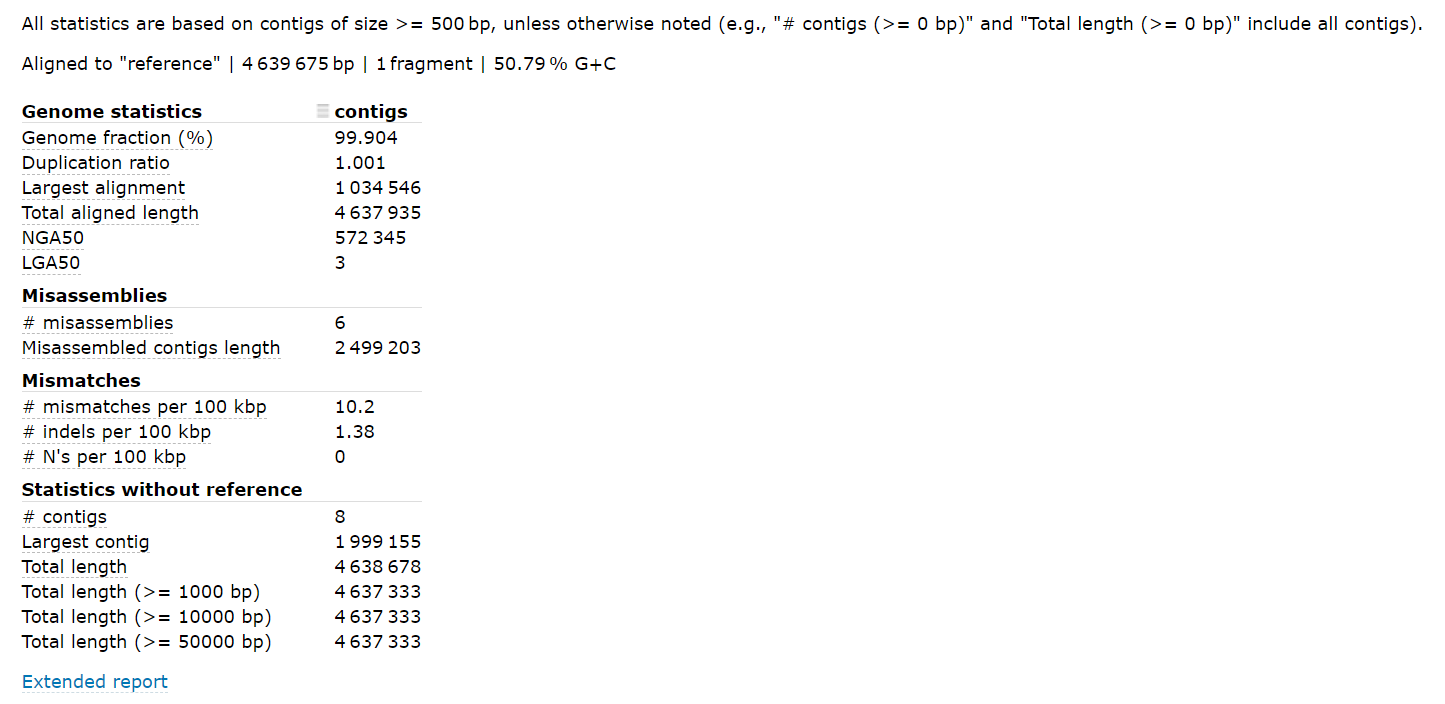

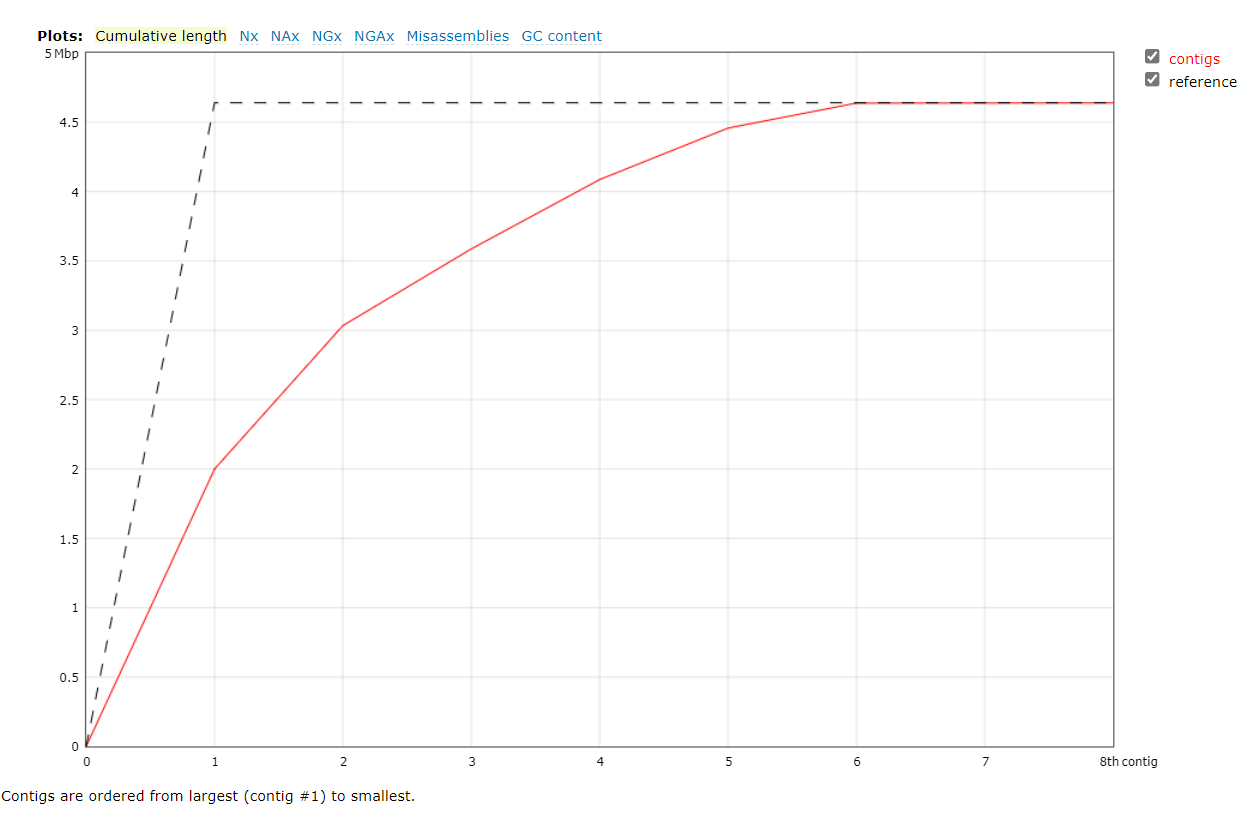

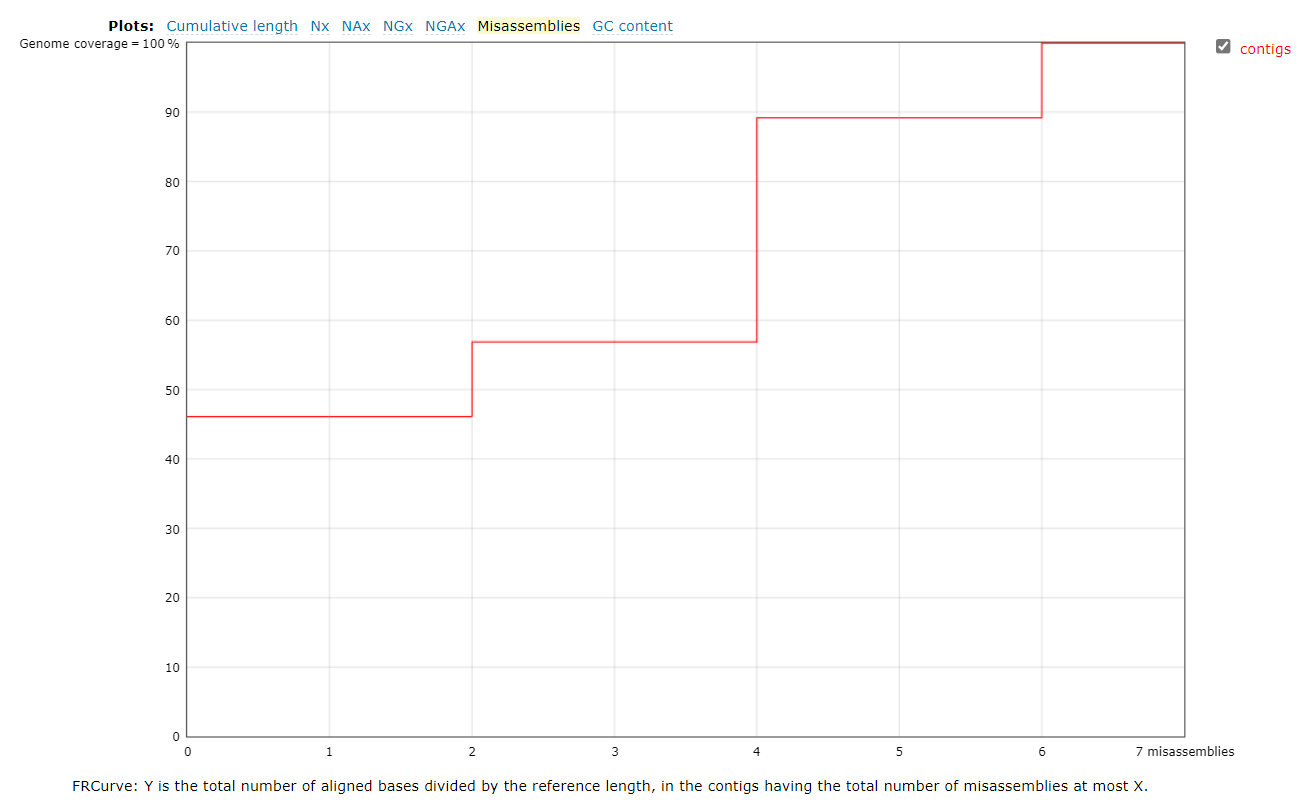

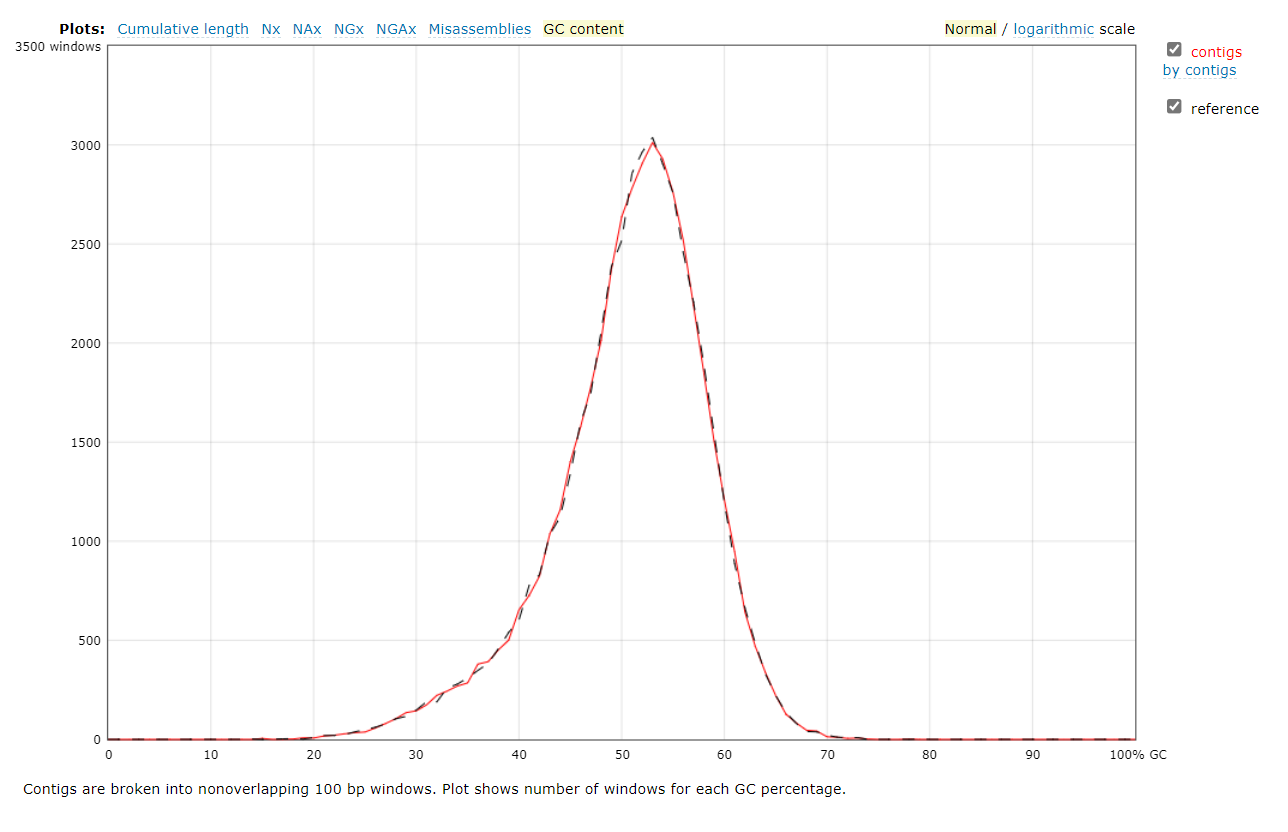

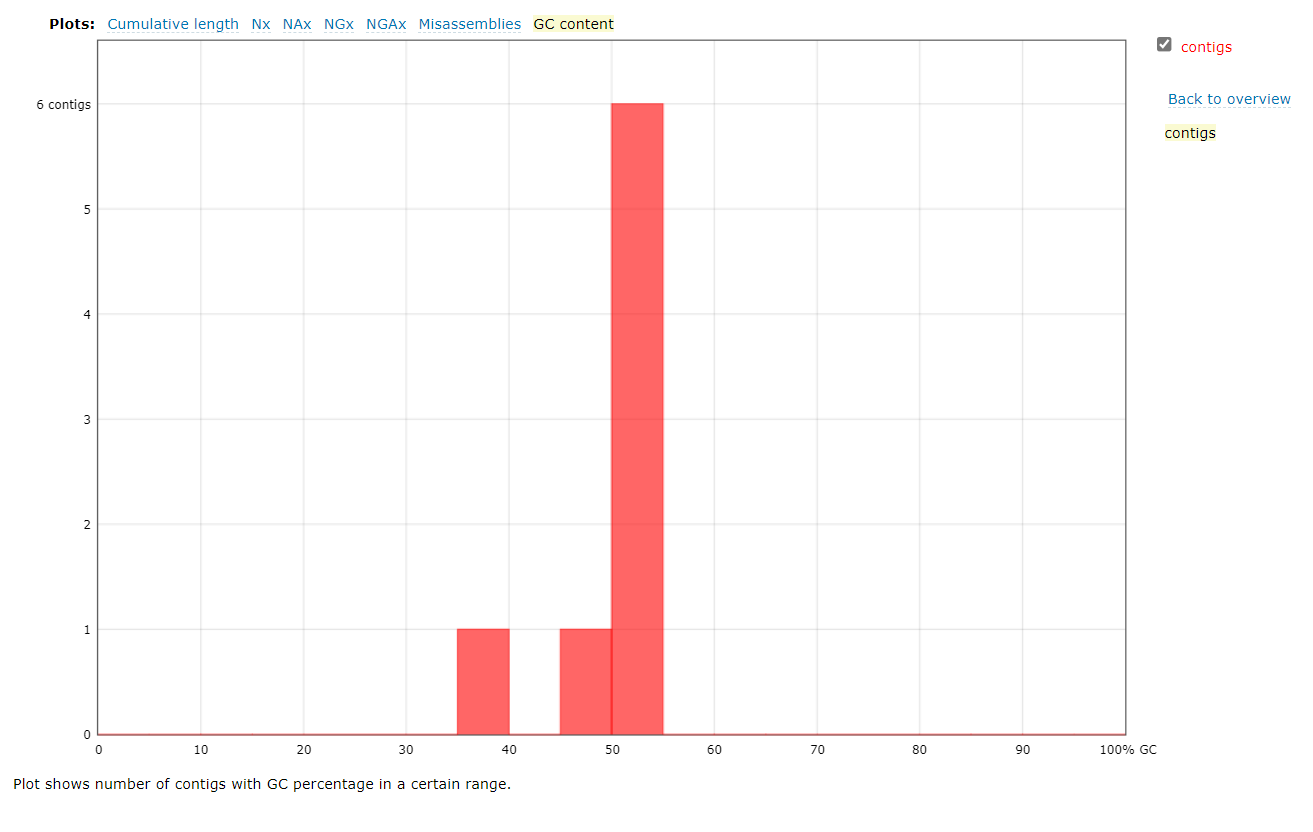

- pacbio_20x, illumina.100x.1 & illumina.100x.1

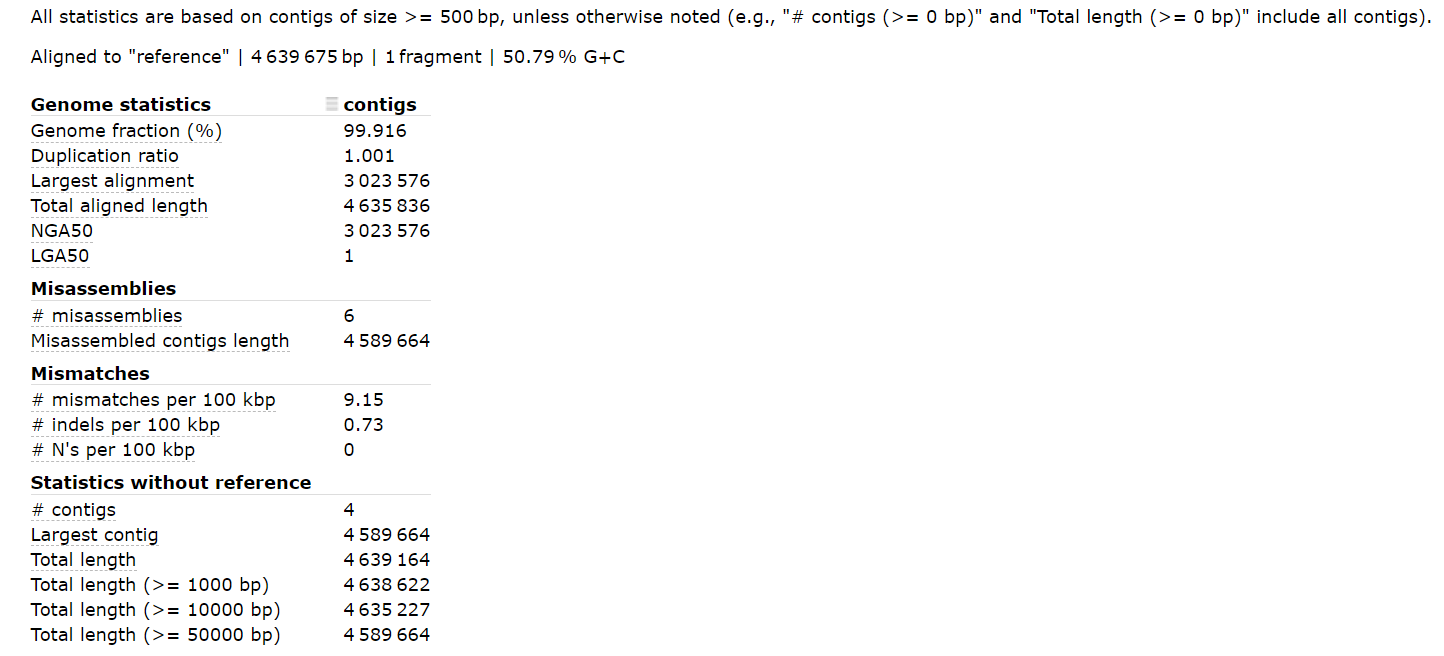

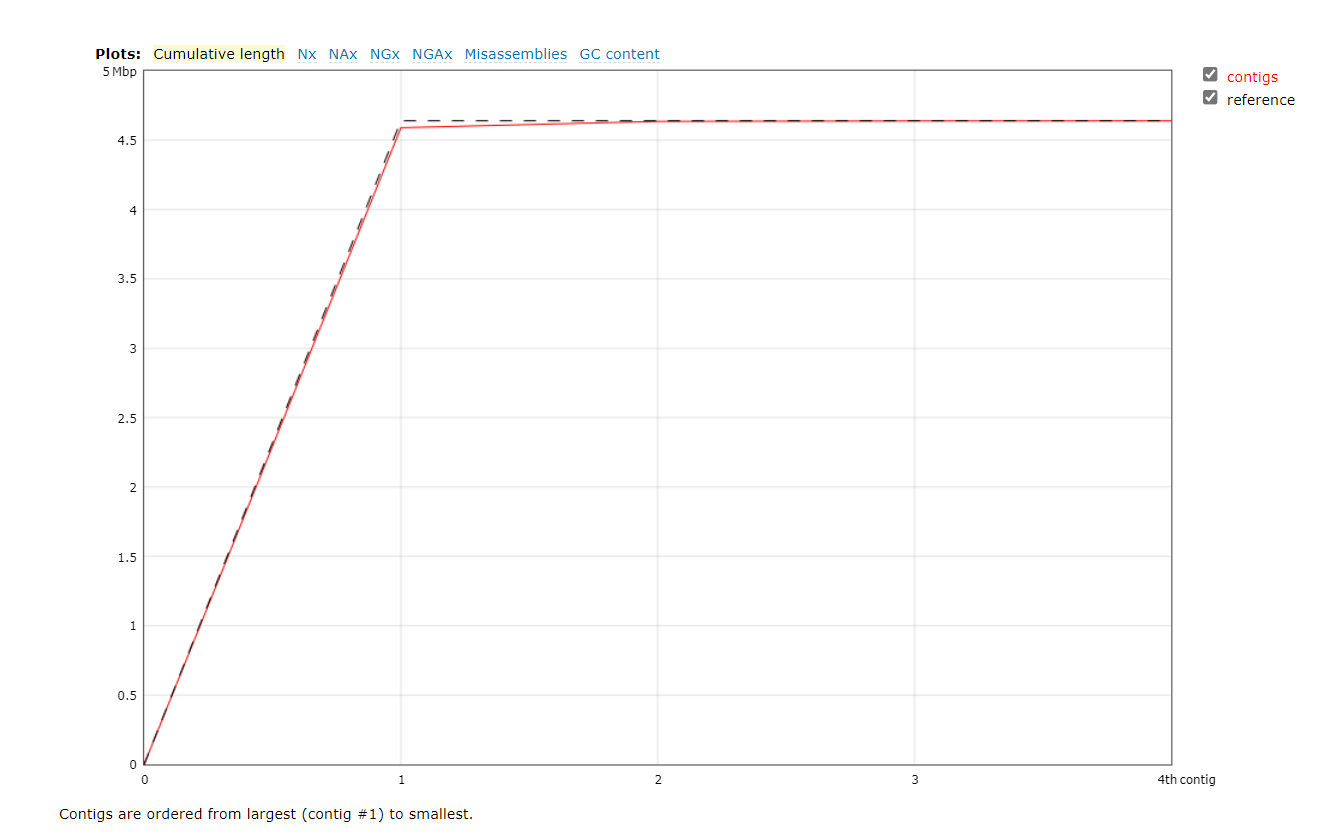

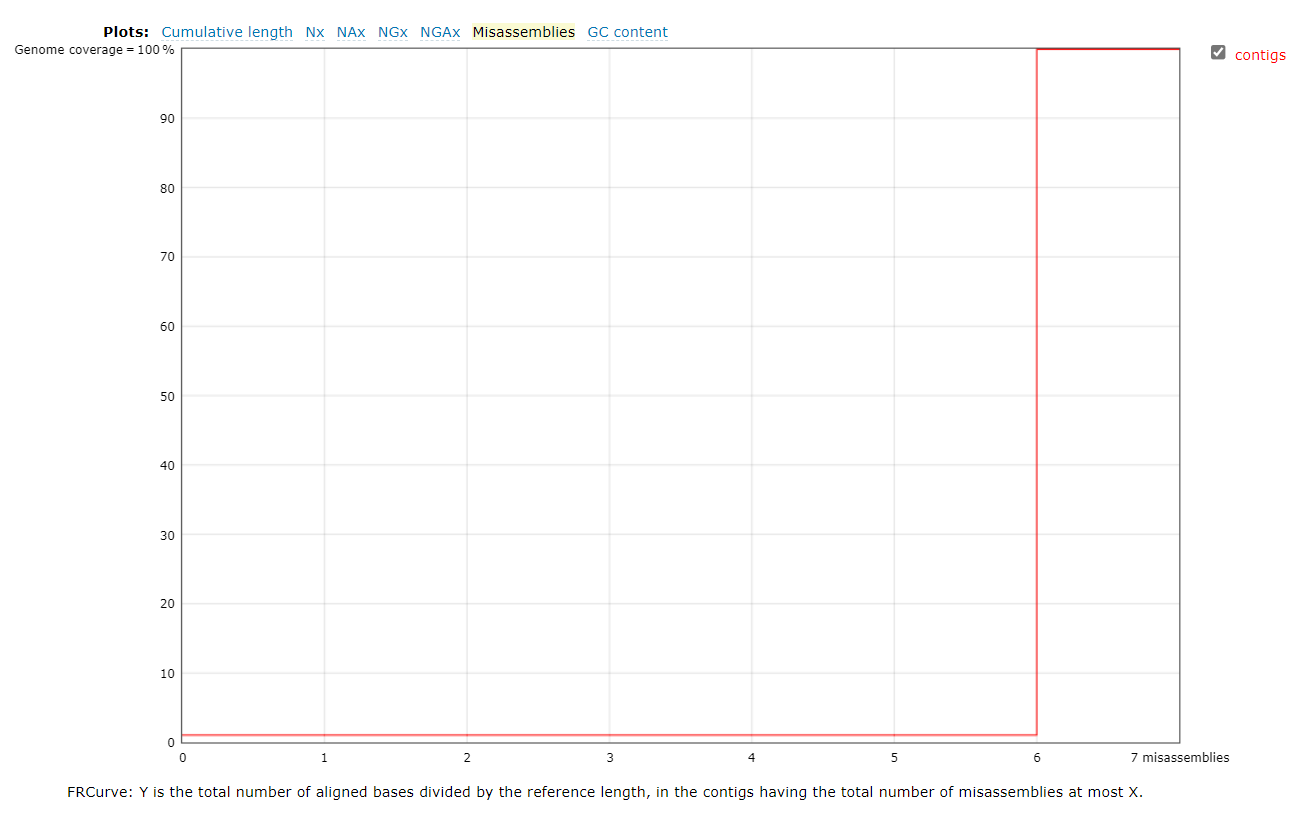

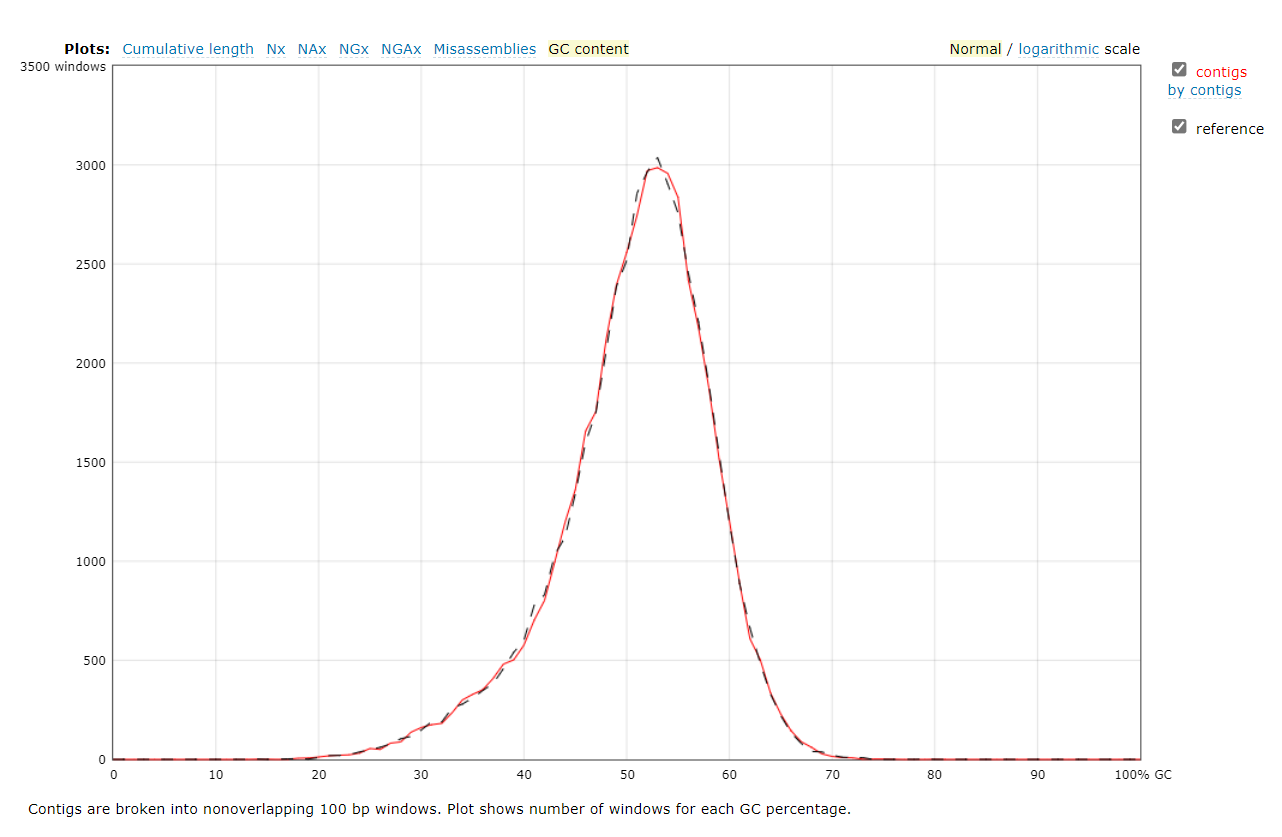

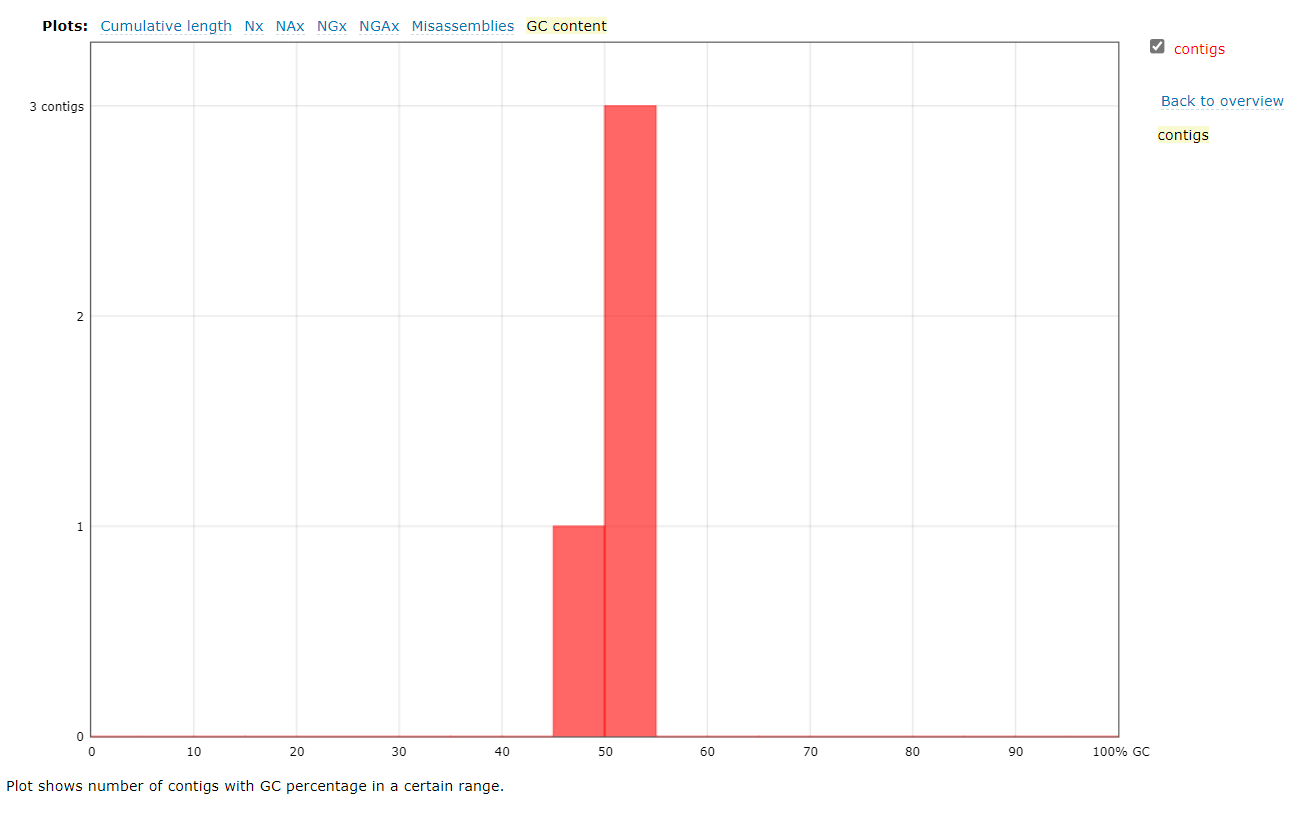

- pacbio_40x, illumina.100x.1 & illumina.100x.1

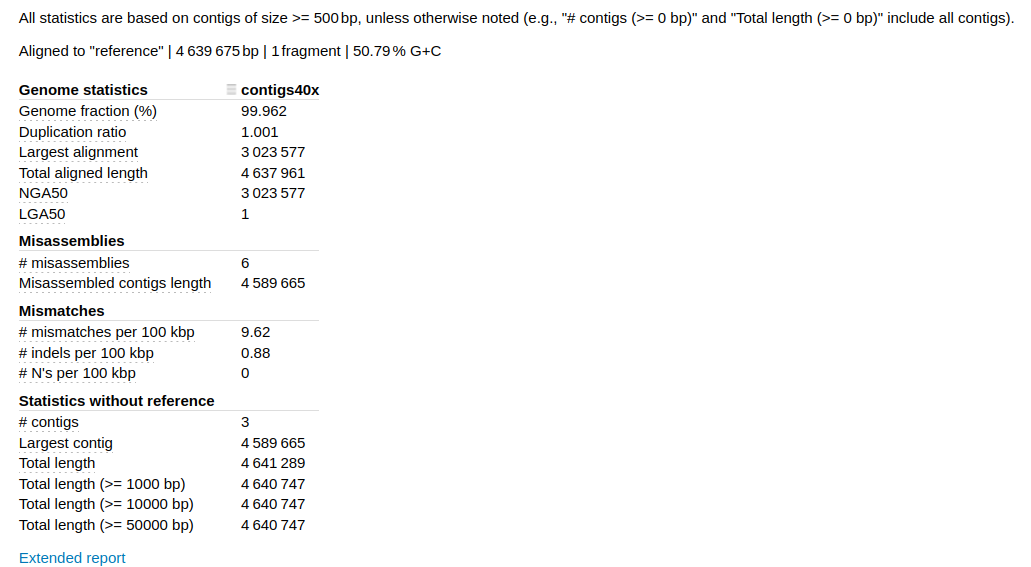

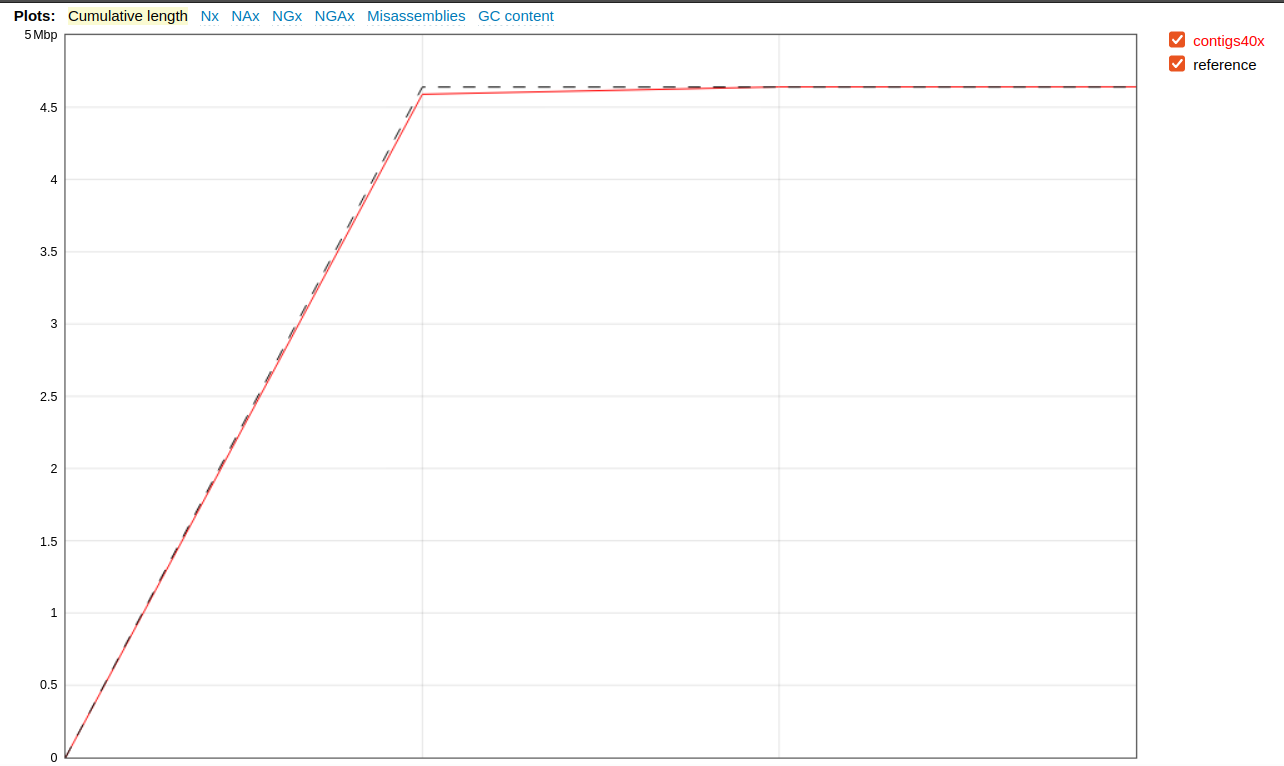

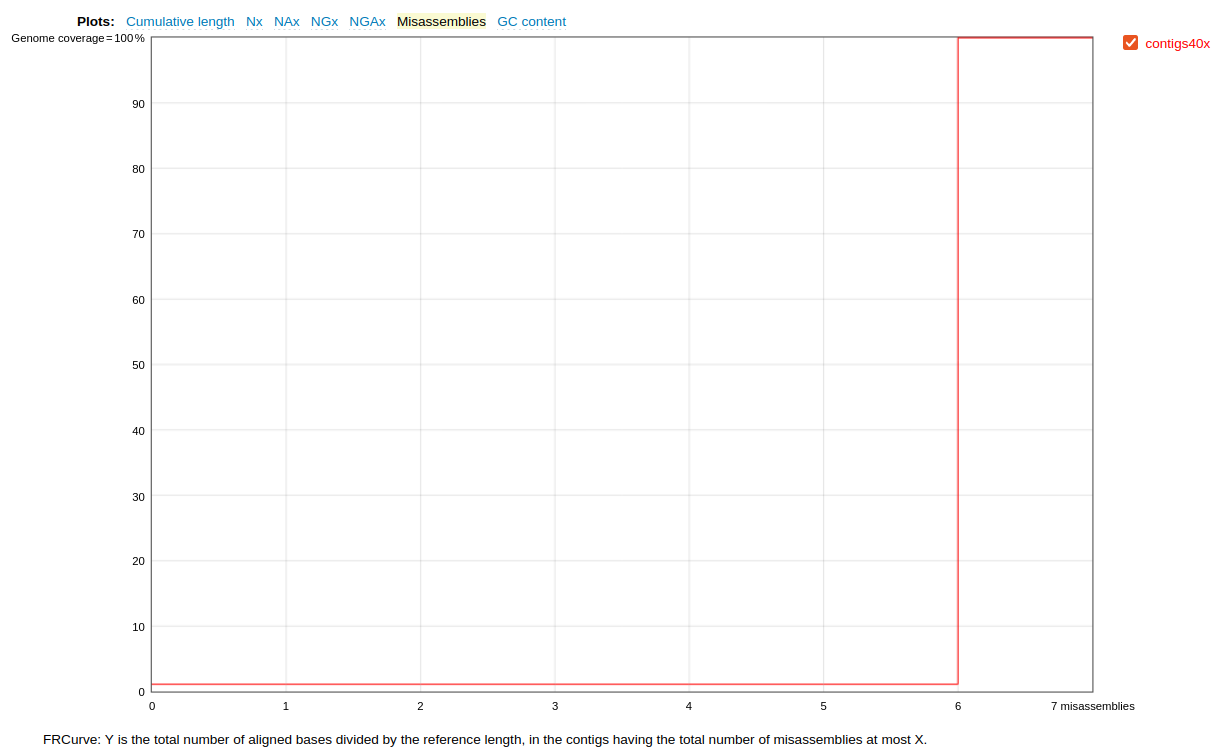

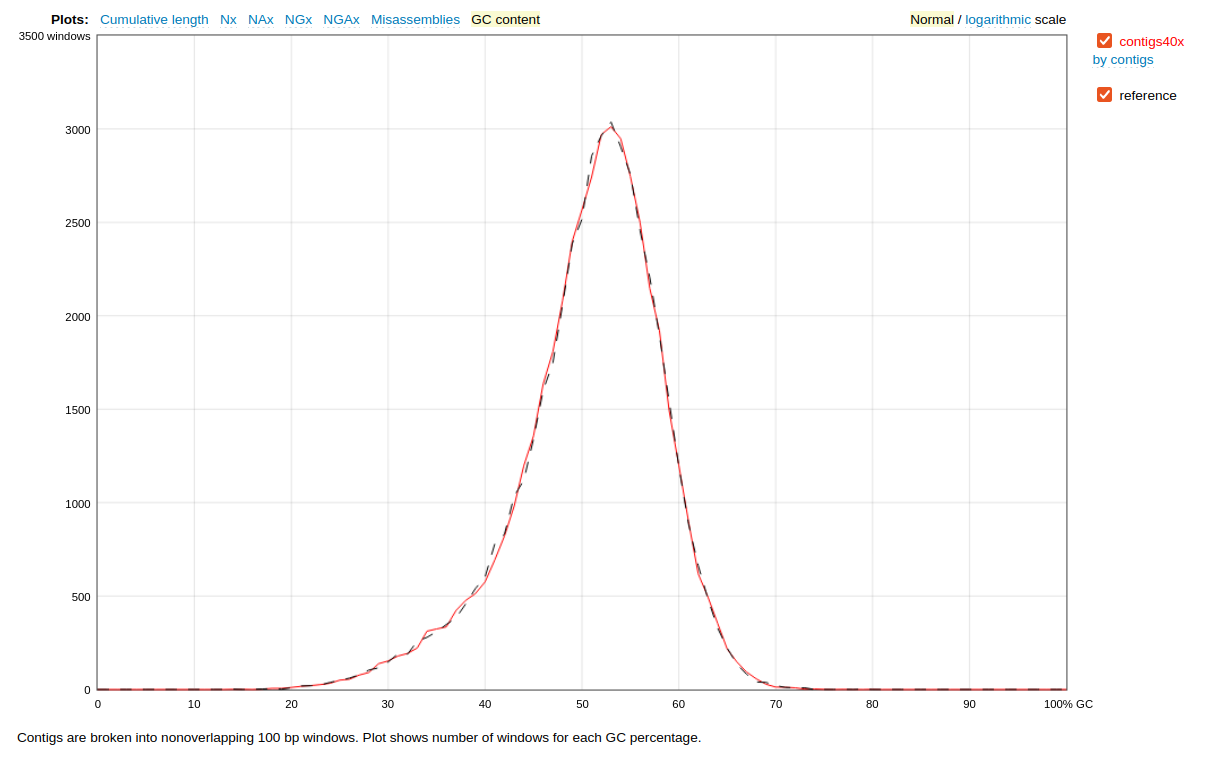

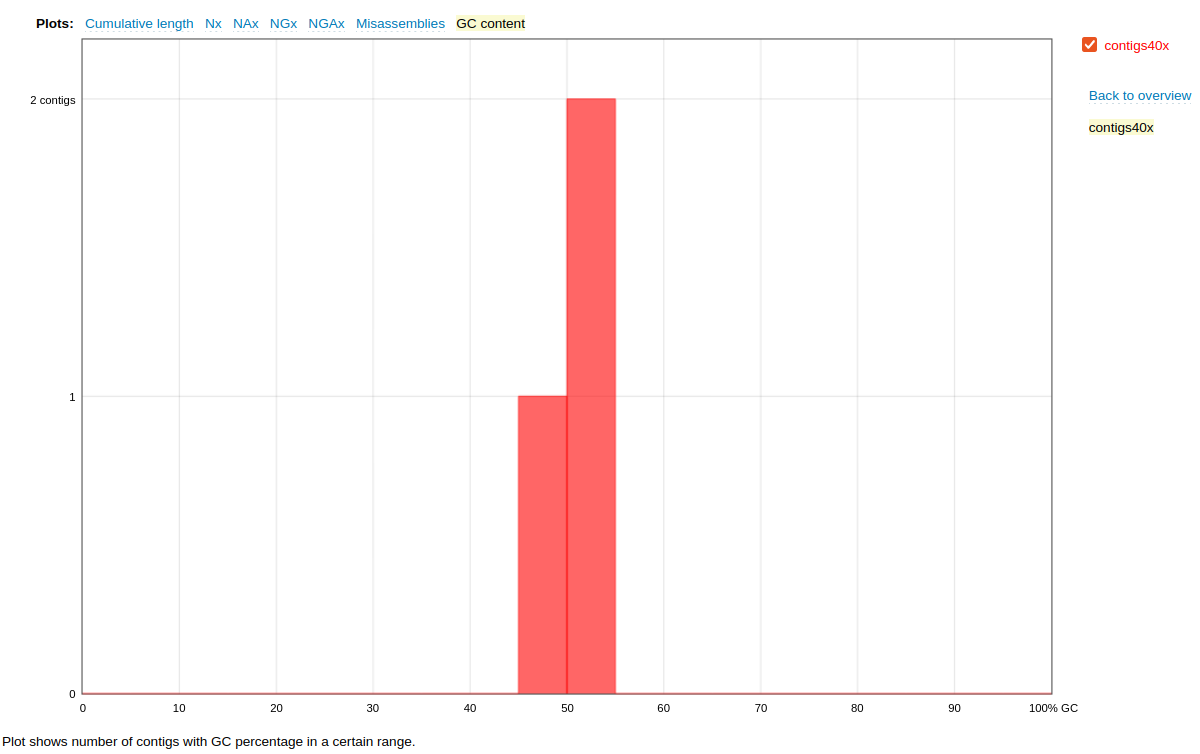

- pacbio_80x, illumina.100x.1 & illumina.100x.1

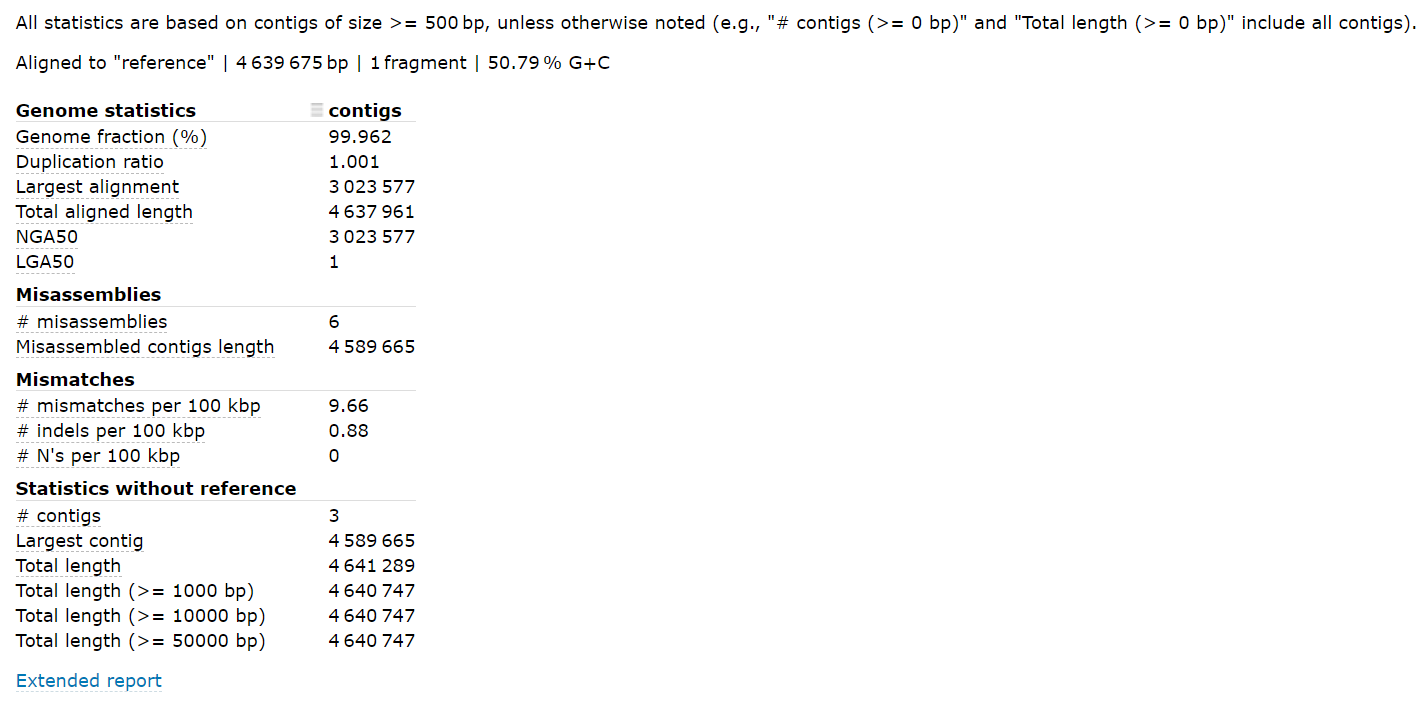

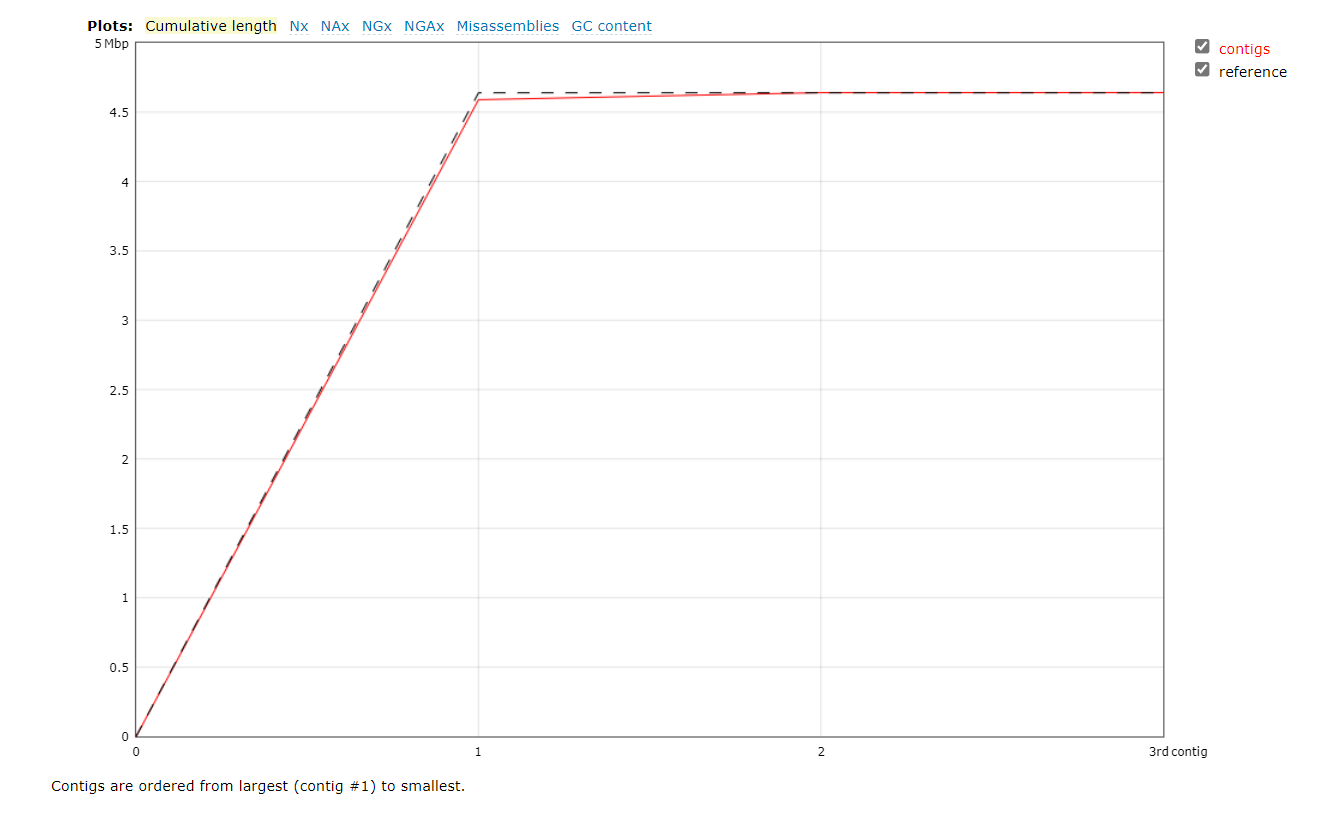

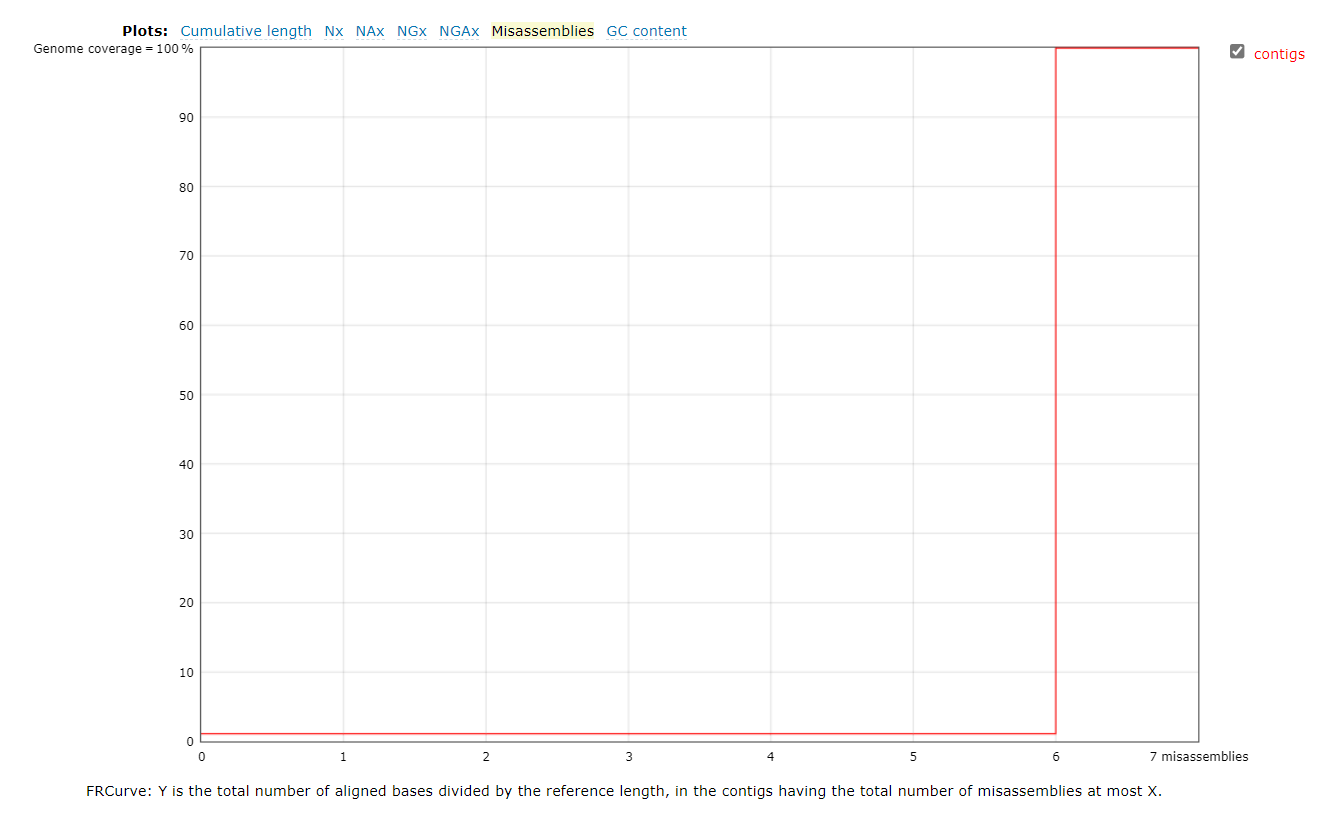

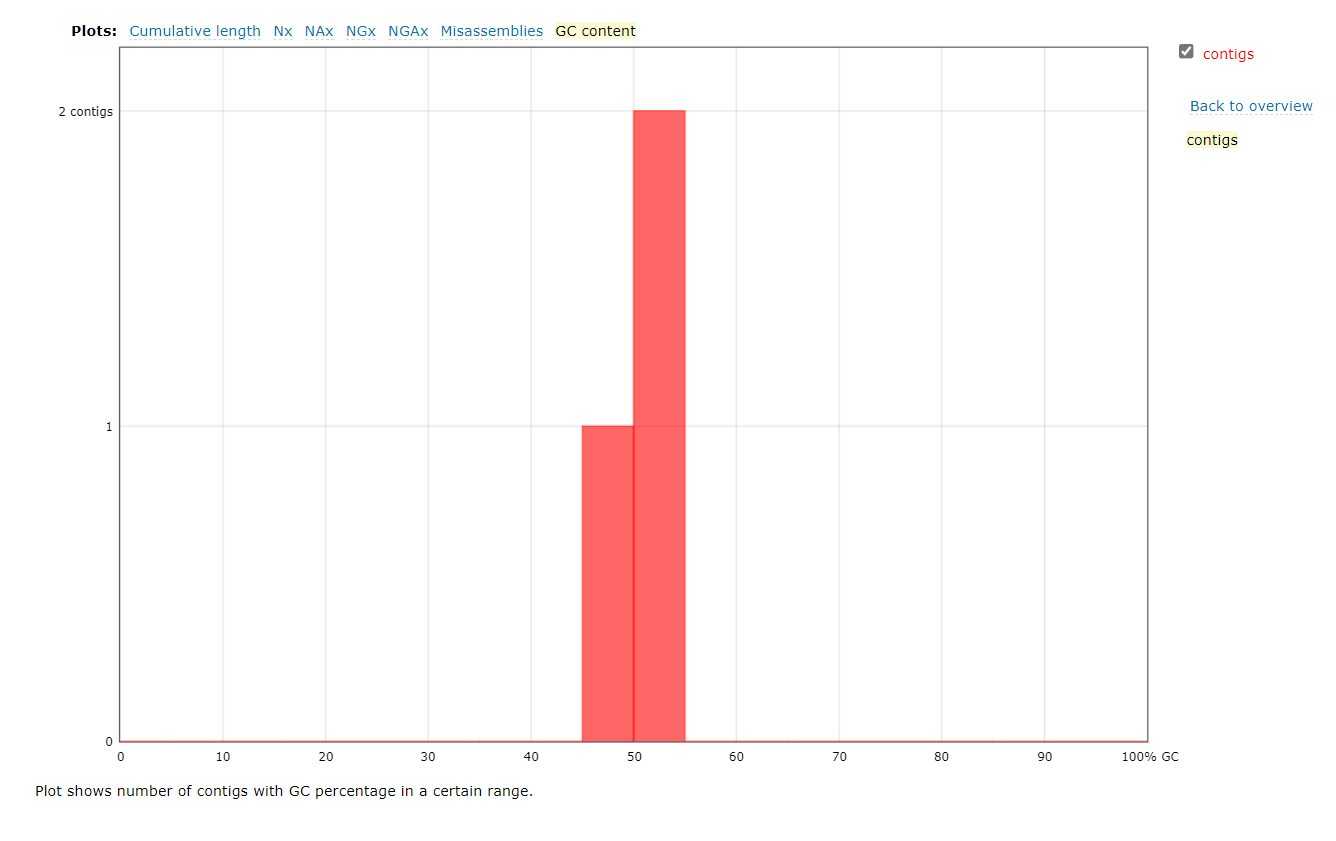

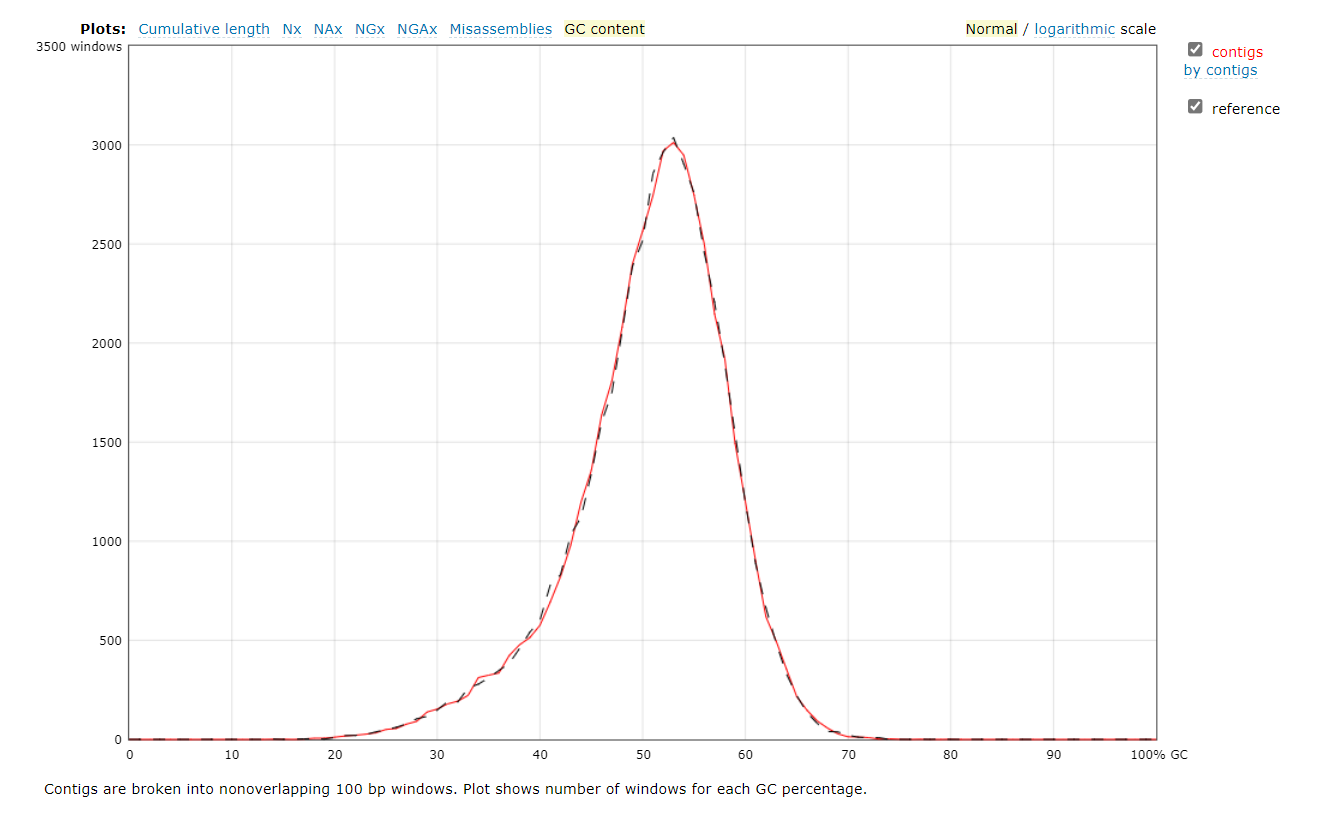

### Анализ полученных результатов

Сначала сравним между собой сборки, полученные с помощью длинных ридов с разным покрытием: можно сразу отметить, что с увеличением покрытия уменьшается число контигов, для 40x и 80x получили один контиг, для 20х получили 2 контига, для 10х получили 17 контигов. Но видно также, что уменьшение числа контигов с увеличением покрытия уменьшается не линейно. То есть в какой-то момент очень большое покрытие может быть избыточым, поскольку для 40х и 80х получился похожий результат.

Далее проанализируем графики *Cumulative length* для длинных ридов: видим, что с увеличением покрытия график становится совпадающим с референсом. Этот график отображает оказывает рост длин контигов. На оси x контиги упорядочены от самого большого к самому маленькому. Ось y задает размер x самых больших контигов в сборке.‎ Для 10х покрытия видим, что контиги разной длины, с увеличением покрытия получаем контиги, равномерно покрывающие геном.

Количество *misassemblies‎‎* для большого покрытия у ридов может быть большим из-за того, что кольцевая хромосома "сшилась" не в том месте. 

Еще заметим, что самый длинный контиг для 10х составляет лишь 10% от всей длины генома. В то время как для более высокого покрытия самый длинный контиг составляет почти 100%. Также заметим, что с увеличением покрытия у ридов увеличивается (хотя не очень значительно) покрытие генома ридами.

Для коротких ридов видим большое количество контигов (97), при этом GC-контент не такой гладкий (у длинных ридов хорошо накладывается на референсный) как у длинных ридов. Но зато у коротких ридов *misassemblies‎‎* равно нулю, то есть сборщик не вызвал ошибок (ошибок сборки). Для сборки котортких ридов нашими исходными данными были парные риды, в то время как для длинных ридов нет.

Для гибридной сборки число контигов 8, 6, 3 и 3 (для покрытий 10х, 20х, 40х и 80х соответственно) и также присутствуют ошибки сборки, но их уже не так много, как в негибридной сборке длинных ридов. GC-контент также выглядит достаточно гладким.